## Modelo

Datos proporcionados ajustados con Padron: 110416

* Área de Terreno

\begin{equation}
A_{\text{terr}} = 17.32 \times \left( \frac{NP}{3000} \right) \, \text{m}^2
\end{equation}

\begin{equation}
A_{\text{terr}} = 17.32 \times \left( \frac{110416}{3000} \right) \approx 637.64 \, \text{m}^2
\end{equation}

* Área del Sótano

\begin{equation}
A_{\text{so}} = 8.66 \, \text{m} \times 8.66 \, \text{m} = 75 \, \text{m}^2
\end{equation}

* Caudal máximo de la bomba ($Q_{\text{max}}$): 8 m³/h para la bomba existente
* Desnivel máximo de la bomba ($\Delta H_{\text{max}}$): 4 m
* Desnivel mínimo de la bomba ($\Delta H_{\text{min}}$): 1 m
* Altura del sótano ($H_s$): 3.5 m
* Coeficiente de infiltración con el suelo saturado ($C_{\text{sat}}$): 0.90
* Coeficiente de infiltración inicial ($C_0$): 0.60
* Tiempo Característico

\begin{equation}
t_k = \left( 1 - \frac{NP}{140000} \right) \, \text{h}
\end{equation}

\begin{equation}
t_k = \left( 1 - \frac{110416}{140000} \right) \approx 0.21 \, \text{h}
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

Q_max= 8

# Datos proporcionados ajustados con Padron: 110416
NP = 110416  # Número proporcionado del padron

# Área de Terreno
A_terr = 17.32 * (NP / 3000)  # en metros cuadrados

# Área del Sótano
A_so = 8.66 * 8.66  # en metros cuadrados

# Caudal máximo de la bomba (Q_max)
Q_max = 8  # en metros cúbicos por hora (m^3/h)

# Desnivel máximo de la bomba (Delta_H_max)
Delta_H_max = 4  # en metros

# Desnivel mínimo de la bomba (Delta_H_min)
Delta_H_min = 1  # en metros

# Altura del sótano (H_s)
H_s = 3.5  # en metros

# Coeficiente de infiltración con el suelo saturado (C_sat)
C_sat = 0.90

# Coeficiente de infiltración inicial (C_0)
C_0 = 0.60

# Tiempo Característico
t_k = 1 - NP / 140000  # en horas

#Volumen del sotano
V_so = H_s * A_so


# Datos proporcionados por el enunciado
intensidades = np.array([241.4, 190.7, 162.6, 119.6, 85.0, 41.7, 26.4, 16.7, 10.9, 5.2])  # Intensidades de precipitación en m/h
duraciones = np.array([5, 10, 15, 30, 60, 180, 360, 720, 1440, 4320]) / 60  # Duraciones de precipitación en minutos

# Definición de funciones
#ecuacion 1
def calcular_tasa_cambio_volumen(Q_in, Q_out):
    return Q_in - Q_out

#ecuacion 2
def calcular_caudal_entrada(C, I, A_terr):
    return C * I/1000 * A_terr

## I MM -> M = 0,001 --> digamos dividimos por mil para que quede en metros
# A terr = mcuadrados
# te queda m3/hora

## ecuacion 3:
def calcular_caudal_salida(Q_max, Delta_H, Delta_H_max, Delta_H_min):
    argumento = (Delta_H_max - Delta_H) / (Delta_H_max - Delta_H_min)
    if argumento < 0:
        raise ValueError("El argumento de la raíz cuadrada es negativo")

    return Q_max * math.sqrt(argumento)

# Qmax = mcubico/hora
# delta m

#ecuacion 4
def calcular_desnivel(H_0, H):
    return H - H_0

#ecuacion 5
def calcular_altura_agua(V, A_so):
    return V / A_so

#ecuacion 6
def cambio_coef_infiltracion(V, V_total, V_t, C_sat, C):
    return (V / (V_so * t_k) * (C_sat - C))



## Modelacion del sistema

## **A.1 ) Discretización de la Ecuación 1 con Método de Euler (C = 1, $Q_{\text{sal}} = 0$)**

Entonces dada la ecuacion 1:

Discrepamos ec 1 usando C=1 y $Q_{sal}$ = 0  el metodo de Euler como :


\Delta V =(Q_{\text{in}} - Q_{\text{out}}).\Delta t

In [2]:
#ecuacion 7
def calcular_cambio_volumen(Q_in, Q_out, delta_t):
    return (Q_in - Q_out) * delta_t


Donde $ \Delta V $ es la diferencia del Volumen en $ \Delta t $


Y la ecuacion 6 discretamos como :

\Delta C = \frac{V_{\text{total}}}{V_t \cdot V \cdot} .  (C_{\text{saturado}} - C) \cdot \Delta t


In [3]:
#ecuacion 8
def calcular_cambio_coeficiente_infiltracion(V, C, delta_t ):
    if V < 0 :
        return 0
    cambio_coeficiente = (V / (V_so * t_k)) * (C_sat - C) * delta_t

    return cambio_coeficiente



Donde $\Delta C$ es el cambio en el coeficiente de infiltración


In [4]:
def euler(V_t,H_0,C,intensidad,delta_t):
    H = calcular_altura_agua(V_t, A_so)
    Delta_H = calcular_desnivel(H_0, H)
    Q_out = calcular_caudal_salida(Q_max, Delta_H, Delta_H_max, Delta_H_min)
    Q_in = calcular_caudal_entrada(C, intensidad, A_terr)
    delta_V = calcular_cambio_volumen(Q_in, Q_out, delta_t)
    delta_C = calcular_cambio_coeficiente_infiltracion(V_t, C, delta_t)

    C += delta_C
    V_t += delta_V

    return V_t, C, H

Ahora vamos a utilizar la fórmula del método de Euler para actualizar el volumen en cada paso de tiempo hasta que se alcance el tiempo total de la tormenta (60 minutos en este caso)


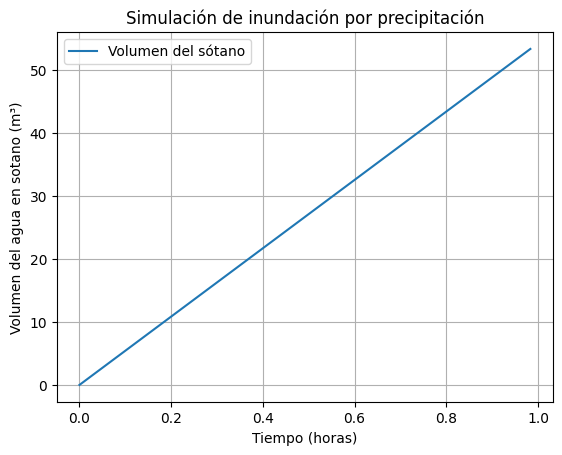

Volumen de agua almacenado en el sótano: 54.18 m³
Volumen de lluvia para la precipitación de 60 minutos: 54.18 m³/hora


In [5]:
import matplotlib.pyplot as plt

delta_t = 1/60  # Paso de tiempo en horas, un minuto por iteración
V_t = 0
C = 1
t = 0
I = intensidades[4]
duracion = duraciones[4]
Q_out = 0
Q_in = calcular_caudal_entrada(C, I , A_terr)

tiempos = []
volumenes = []

while t <= duracion:
    tiempos.append(t)
    volumenes.append(V_t)

    delta_V = calcular_cambio_volumen(Q_in, Q_out, delta_t)
    V_t += delta_V
    t += delta_t

# Graficar el volumen del sótano en función del tiempo
plt.plot(tiempos, volumenes, label='Volumen del sótano')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Volumen del agua en sotano (m³)')
plt.title('Simulación de inundación por precipitación')
plt.legend()
plt.grid(True)
plt.show()


# Verificar que el volumen de agua almacenado en el sótano coincida con el volumen de lluvia
print(f"Volumen de agua almacenado en el sótano: {V_t:.2f} m³")
# El area se multiplica por 10 ya que 1mm = 10m3
print(f"Volumen de lluvia para la precipitación de 60 minutos: {(85 * A_terr)/1000 :.2f} m³/hora")


Verificamos si el volumen de agua almacenado coincide con el volumen de lluvia.
Es similar pero no igual :(

## **A.2) Discretización de las Ecuaciones 1 y 6 con Método de Euler (Variables C y $Q_{\text{sal}}$)}**




Para determinar un lapso suficiente para que se vacíe el sótano, podrías graficar la evolución del volumen de agua en el sótano en función del tiempo. Esto te permitirá visualizar cómo cambia el volumen de agua a lo largo del tiempo y determinar cuándo alcanza un valor cercano a cero.

Simulamos como seria Euler

In [6]:
def simular_precipitacion_euler(intensidad, duracion,delta_t):
    V_t = 0         # Volumen total
    t = 0           # Iterador
    H_0 = 0         # Altura inicial del sótano
    C = C_0         # Coeficiente de infiltración inicial

    tiempos = []
    alturas = []
    Q_outs = []
    Cs = []
    Q_ins = []
    Vs = []

    while t <= duracion:

        H = calcular_altura_agua(V_t, A_so)
        Delta_H = calcular_desnivel(H_0, H)
        Q_out = calcular_caudal_salida(Q_max, Delta_H, Delta_H_max, Delta_H_min)
        Q_in = calcular_caudal_entrada(C, intensidad, A_terr)
        delta_V = calcular_cambio_volumen(Q_in, Q_out, delta_t)
        delta_C = calcular_cambio_coeficiente_infiltracion(V_t, C, delta_t)

        C += delta_C
        V_t += delta_V
        if V_t <0:
          V_t = 0
        H_0 = H
        t += delta_t

        tiempos.append(t)
        alturas.append(H)
        Q_outs.append(Q_out)
        Cs.append(C)
        Q_ins.append(Q_in)
        Vs.append(V_t)

    return tiempos, alturas, Q_outs, Cs, Q_ins, Vs ,V_t, C,t

Aca definimos la simulacion pero esperando hasta que se agote el sotano

In [7]:
def simular_precipitacion_euler_hasta_vaciar(intensidad, duracion,delta_t):
    V_t = 0         # Volumen total
    t = 0           # Iterador
    H_0 = 0         # Altura inicial del sótano
    C = C_0         # Coeficiente de infiltración inicial

    tiempos = []
    alturas = []
    Q_outs = []
    Cs = []
    Q_ins = []
    Vs = []

    while t <= duracion:

        H = calcular_altura_agua(V_t, A_so)
        Delta_H = calcular_desnivel(H_0, H)
        Q_out = calcular_caudal_salida(Q_max, Delta_H, Delta_H_max, Delta_H_min)
        Q_in = calcular_caudal_entrada(C, intensidad, A_terr)
        delta_V = calcular_cambio_volumen(Q_in, Q_out, delta_t)
        delta_C = calcular_cambio_coeficiente_infiltracion(V_t, C, delta_t)

        C += delta_C
        V_t += delta_V
        if V_t <0:
          V_t = 0
        H_0 = H
        t += delta_t

        tiempos.append(t)
        alturas.append(H)
        Q_outs.append(Q_out)
        Cs.append(C)
        Q_ins.append(Q_in)
        Vs.append(V_t)


    while   V_t >0:

        H = calcular_altura_agua(V_t, A_so) #esta en metros
        Delta_H = calcular_desnivel(H_0, H)
        Q_out = calcular_caudal_salida(Q_max, Delta_H, Delta_H_max, Delta_H_min)
        Q_in = 0 # dejamos desagotar
        delta_V = calcular_cambio_volumen(Q_in, Q_out, delta_t)
        delta_C = calcular_cambio_coeficiente_infiltracion(V_t, C, delta_t/60 )

        C += delta_C
        V_t += delta_V
        if V_t <0:
          V_t = 0
        t += delta_t
        H_0 = H

        tiempos.append(t)
        alturas.append(H)
        Q_outs.append(Q_out)
        Cs.append(C)
        Q_ins.append(Q_in)
        Vs.append(V_t)

    return tiempos, alturas, Q_outs, Cs, Q_ins, Vs ,V_t, C,t

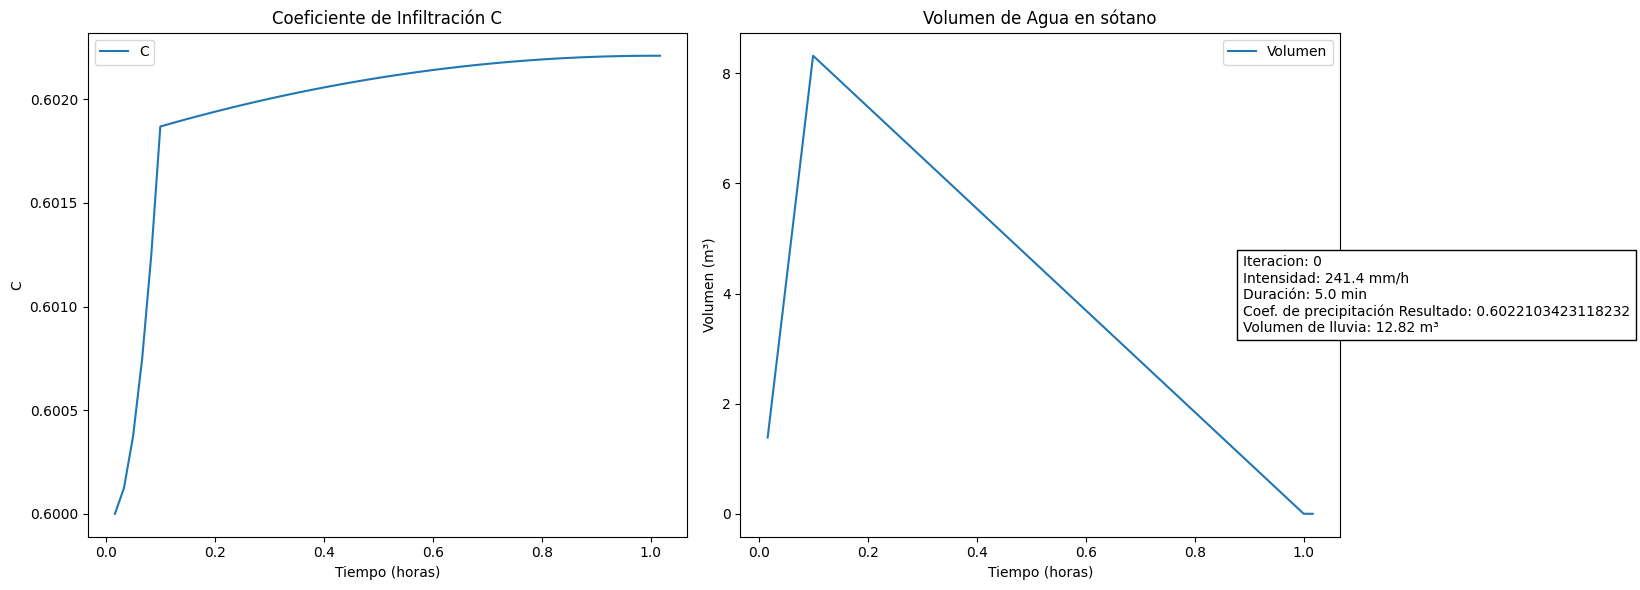

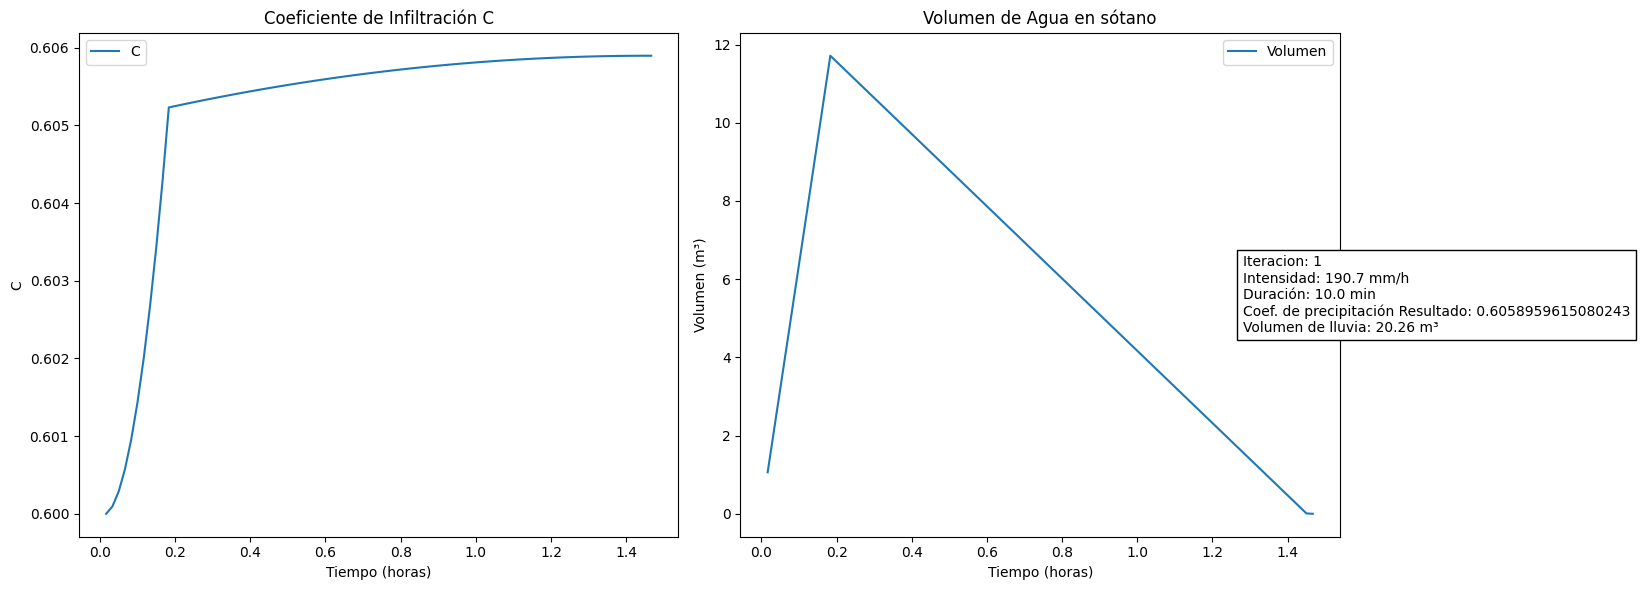

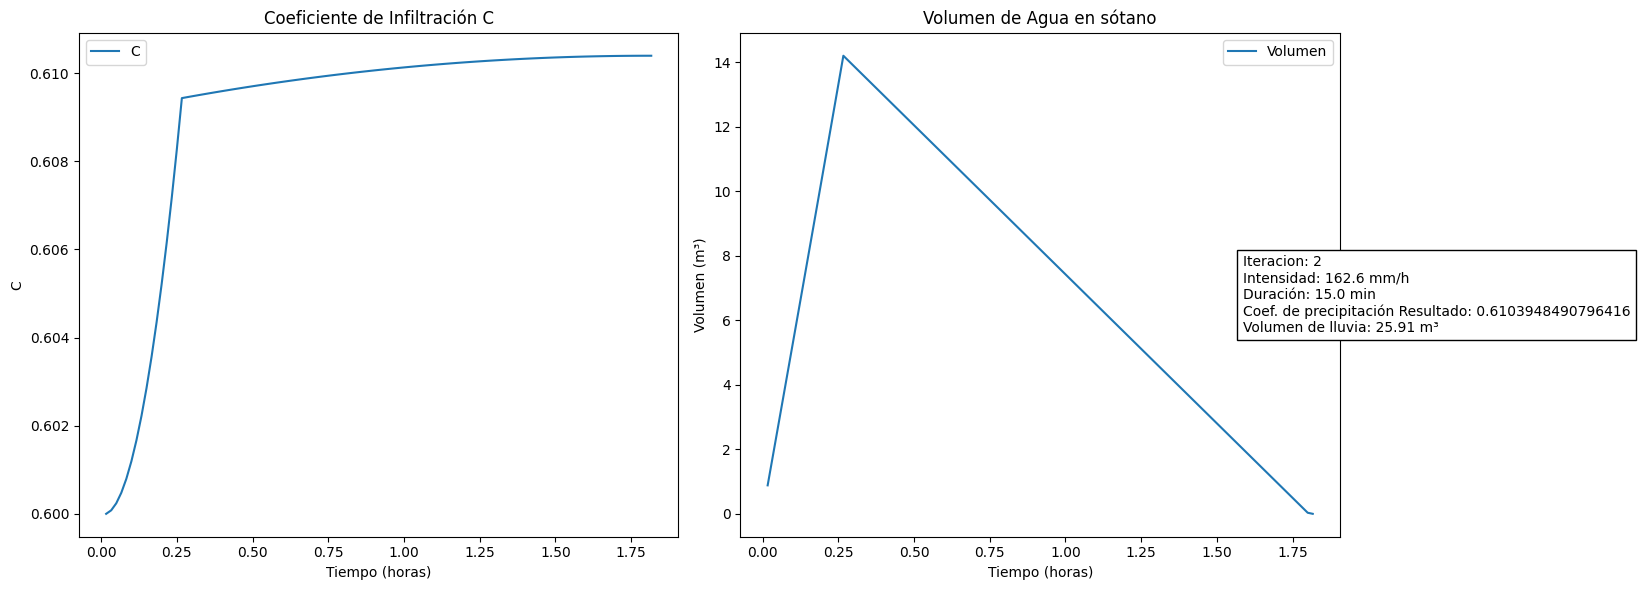

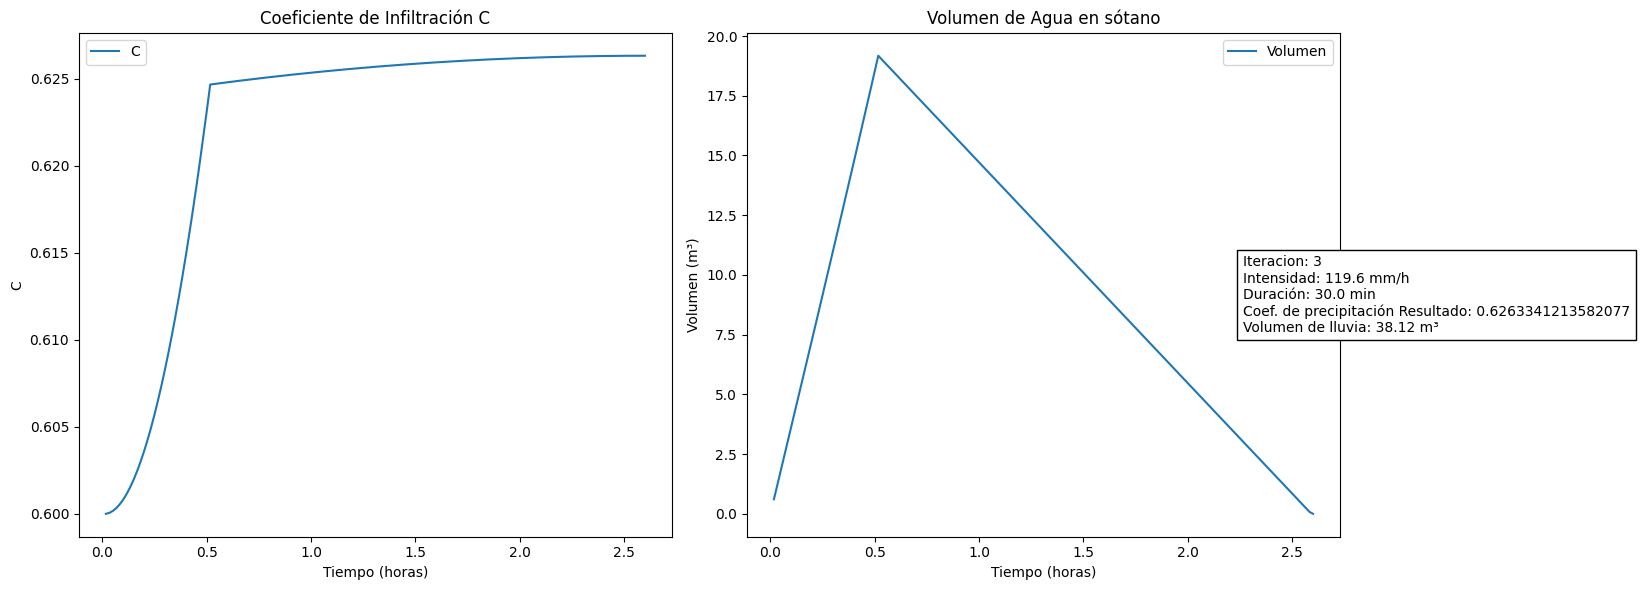

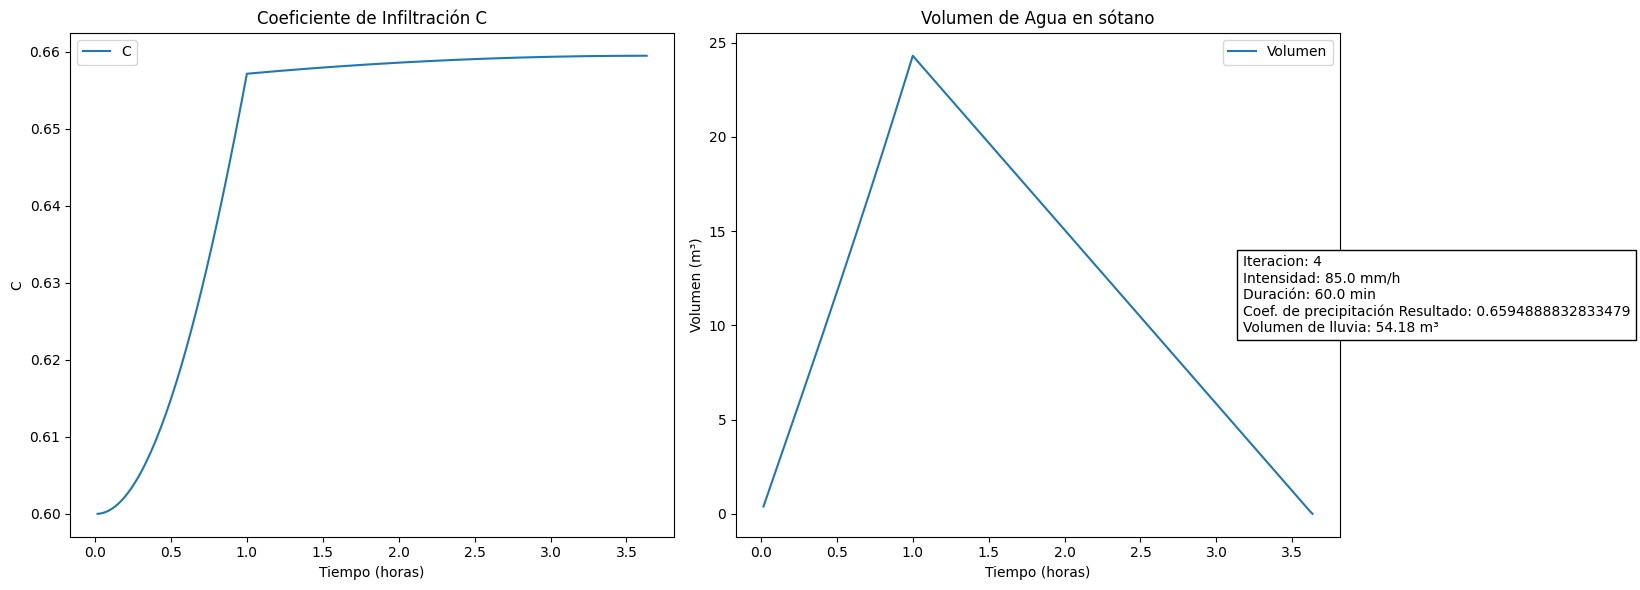

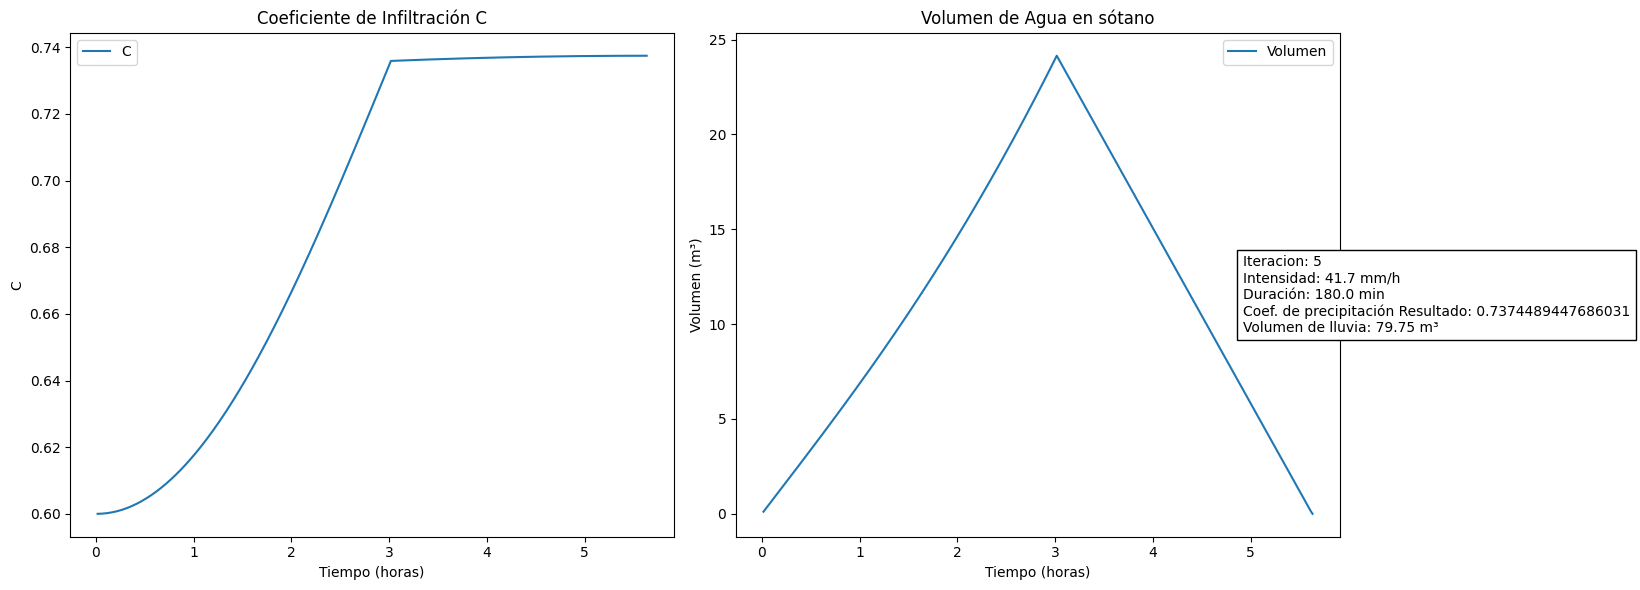

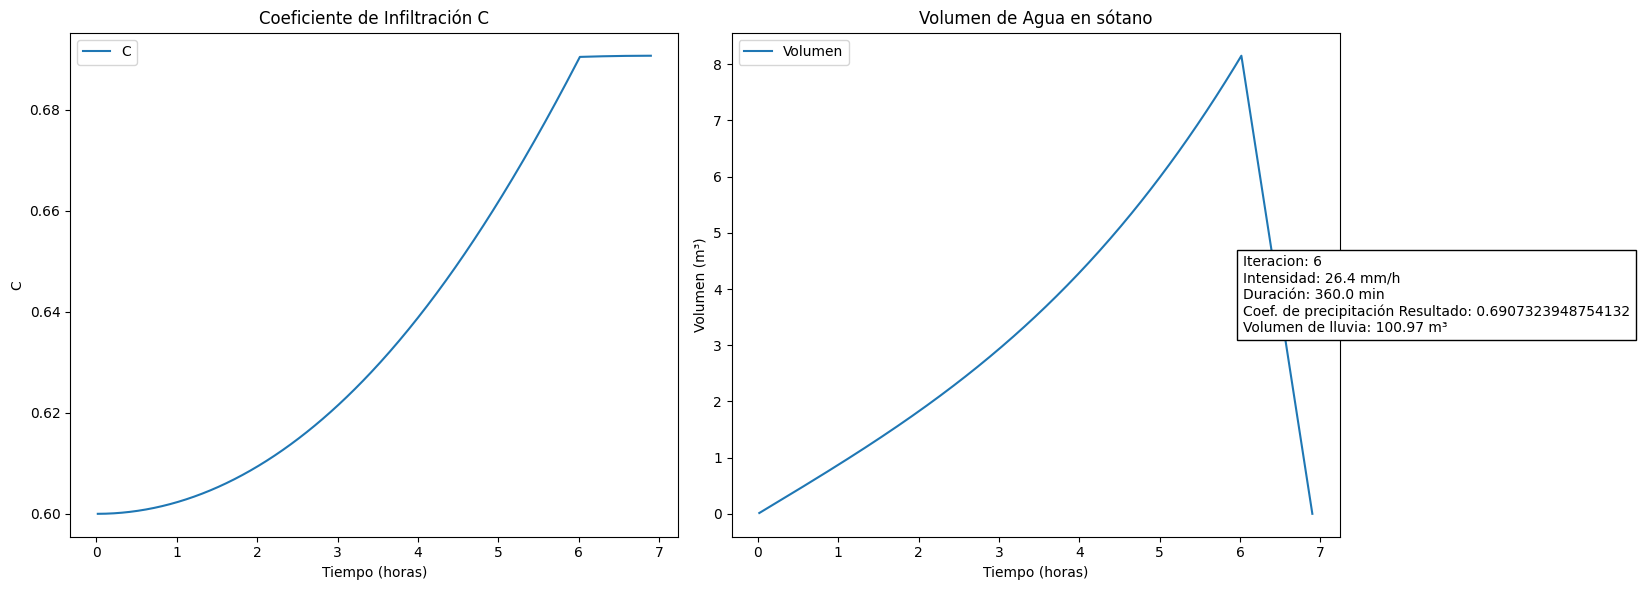

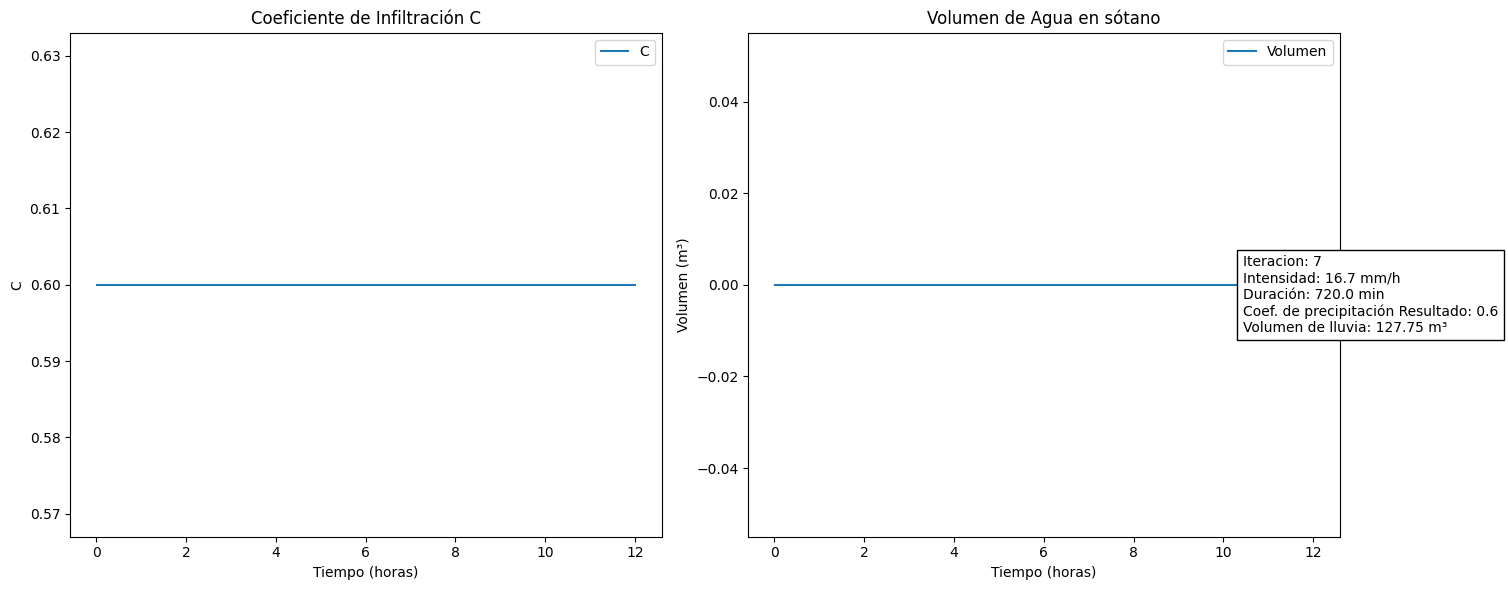

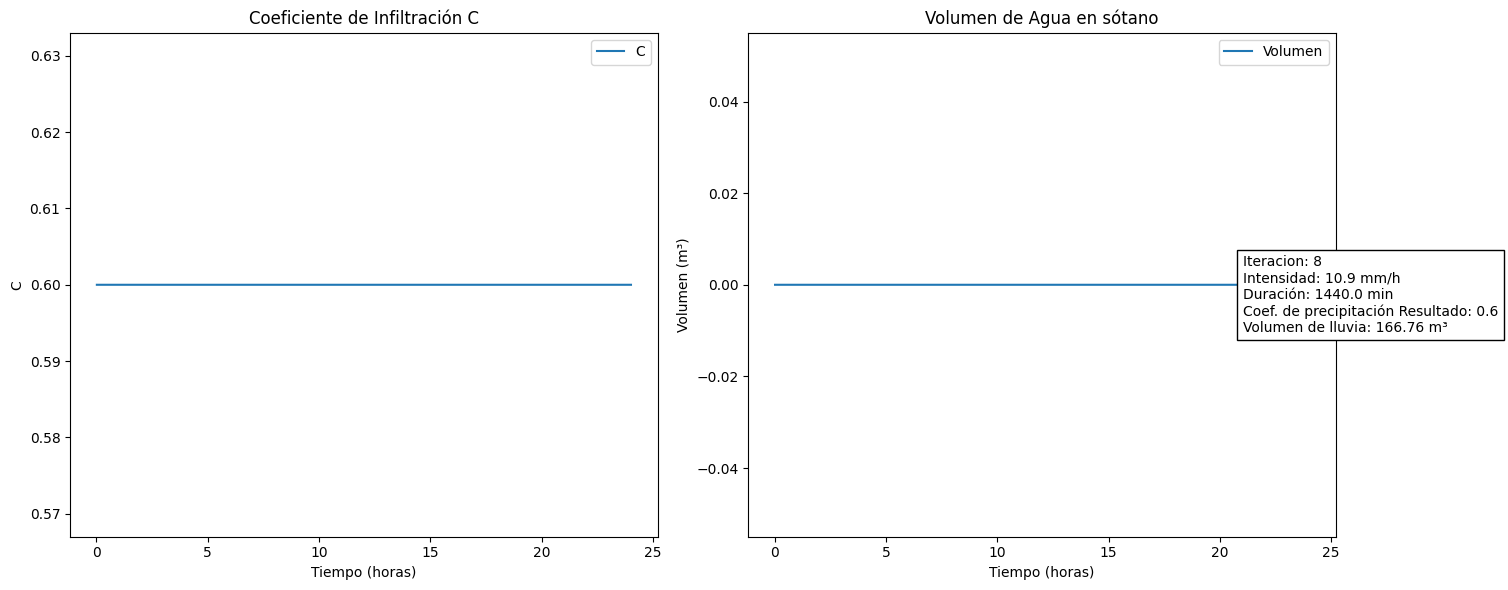

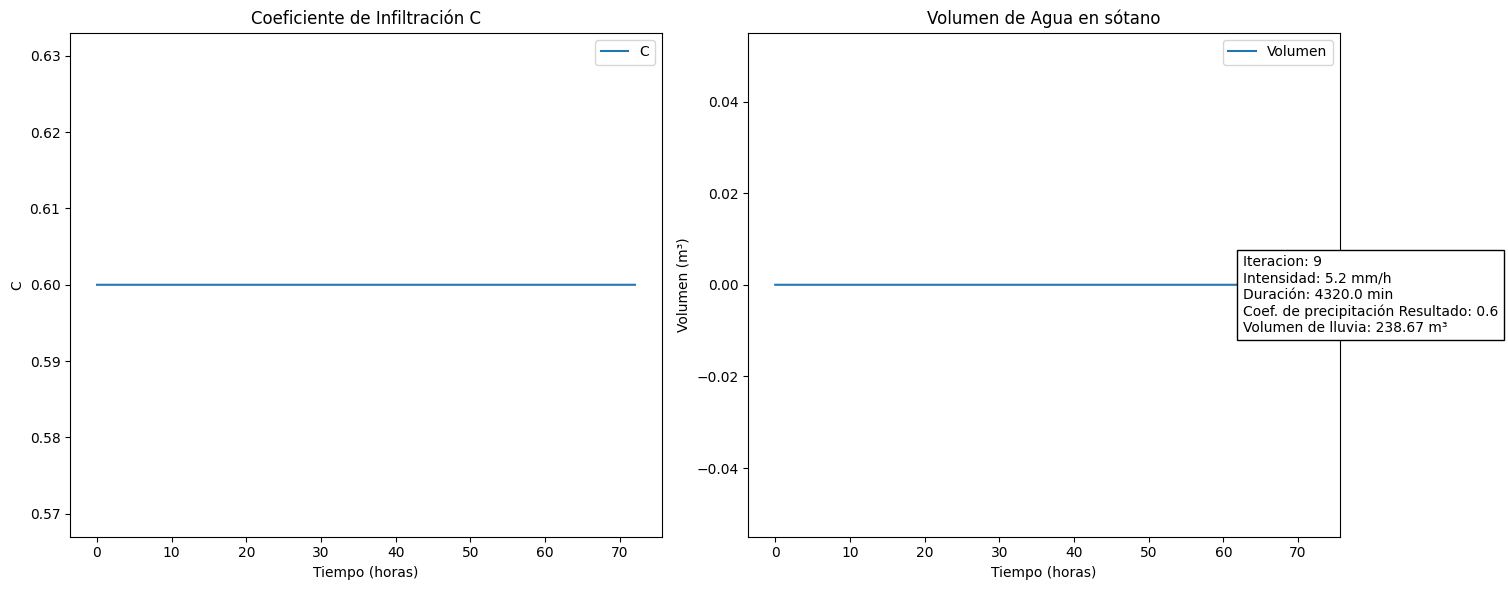

In [8]:
from textwrap import wrap
tiempos_vaciado = []

for i, intensidad in enumerate(intensidades):
    duracion = duraciones[i]
    tiempos, alturas, Q_outs, Cs, Q_ins, Vs, rta_Vt, rta_C, rta_T = simular_precipitacion_euler_hasta_vaciar(intensidad, duracion, delta_t)

    tiempos_vaciado.append(rta_T)

    info_text = (
        f"Iteracion: {i}\n"
        f"Intensidad: {intensidad} mm/h\n"
        f"Duración: {duracion * 60} min\n"
        f"Coef. de precipitación Resultado: {rta_C}\n"
        f"Volumen de lluvia: {intensidad * A_terr * duracion / 1000:.2f} m³"
    )
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(tiempos, Cs, label='C')
    plt.xlabel('Tiempo (horas)')
    plt.ylabel('C')
    plt.title('Coeficiente de Infiltración C')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(tiempos, Vs, label='Volumen')
    plt.xlabel('Tiempo (horas)')
    plt.ylabel('Volumen (m³)')
    plt.title('Volumen de Agua en sótano')
    plt.legend()

    # Ajustar el layout antes de añadir el texto
    plt.tight_layout(rect=[0, 0, 0.85, 1])

    # Añadir información al lado del gráfico, passing in the info_text variable as the text to display
    plt.gcf().text(0.78, 0.5, info_text, fontsize=10, bbox=dict(boxstyle="square,pad=0.4", edgecolor="black", facecolor="white"),
                   transform=plt.gcf().transFigure, ha='left', va='center')

    plt.show()

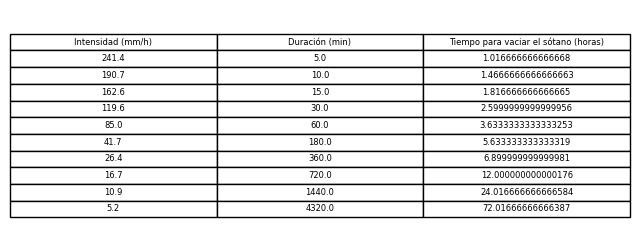

In [9]:
# Crear una tabla con los tiempos de vaciado
import pandas as pd

datos_tabla = {
    "Intensidad (mm/h)": intensidades,
    "Duración (min)": [dur * 60 for dur in duraciones],
    "Tiempo para vaciar el sótano (horas)": tiempos_vaciado
}


tabla_vaciado = pd.DataFrame(datos_tabla)

# Graficar tabla de tiempos de vaciado
fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=tabla_vaciado.values, colLabels=tabla_vaciado.columns, cellLoc='center', loc='center')

plt.show()

## **B) Dimensionamiento de la bomba**

Para redimensionar la bomba y garantizar que la altura de agua sobre el piso del sótano no exceda los 0,25 m para ninguna de las precipitaciones de la tabla, podemos utilizar un enfoque iterativo para encontrar el valor adecuado de Qmax

A continuación, presento la implementación para encontrar el nuevo Qmax mediante una simulación iterativa

In [10]:
def buscar_cota_superior():
    Delta_H_max = 4
    Delta_H = 0.25
    Delta_H_min = 1
    I_max = (241.4/1000)

    # Calcular la cota superior
    cota_superior = C_sat * I_max * A_terr
    argumento = (Delta_H_max - Delta_H) / (Delta_H_max - Delta_H_min)
    resultado = cota_superior / math.sqrt(argumento)

    return resultado

In [11]:
print(buscar_cota_superior())

123.87492704515779


In [12]:
def altura_agua_excede(intensidad, duracion, Q_max):
    V_t = 0
    t = 0
    delta_t = 5/60
    H_0 = 0
    C= C_0

    tiempos = []
    alturas = []

    while t <= duracion:

        H = calcular_altura_agua(V_t, A_so) #esta en metros
        Delta_H = calcular_desnivel(H_0, H)
        Q_out = calcular_caudal_salida(Q_max, Delta_H, Delta_H_max, Delta_H_min)
        delta_C = calcular_cambio_coeficiente_infiltracion(V_t, C, delta_t/60 )
        C += delta_C
        Q_in = calcular_caudal_entrada(C, intensidad, A_terr)
        Delta_V = calcular_cambio_volumen(Q_in, Q_out, delta_t)

        V_t += Delta_V
        if V_t <0:
          V_t = 0
        t += delta_t
        H_0 = H

        tiempos.append(t)
        alturas.append(H)

    if H >= 0.25:
        return True, tiempos, alturas
    return False, tiempos, alturas

In [17]:
def redimensionar_Q(intensidad, duracion, Q_deseado):
    Q_min=8.00
    Q_max=buscar_cota_superior()
    error_tolerancia=0.01
    while (Q_max - Q_min) / 2 > error_tolerancia:
        Q_medio = (Q_max + Q_min) / 2
        excede, tiempos, alturas = altura_agua_excede(intensidad, duracion, Q_medio)
        if excede:
            Q_min = Q_medio
        else:
            Q_max = Q_medio

    Q_optimo = (Q_max + Q_min) / 2
    excede, tiempos, alturas = altura_agua_excede(intensidad, duracion, Q_optimo)

    return Q_optimo, tiempos, alturas

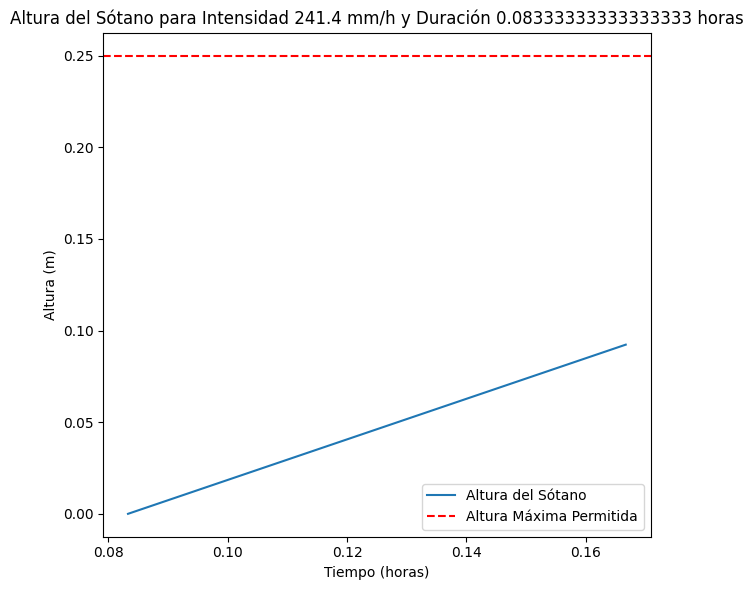

Valor adecuado de Q_max para Intensidad 241.4 mm/h y Duración 0.08333333333333333 horas: 8.007072444277659



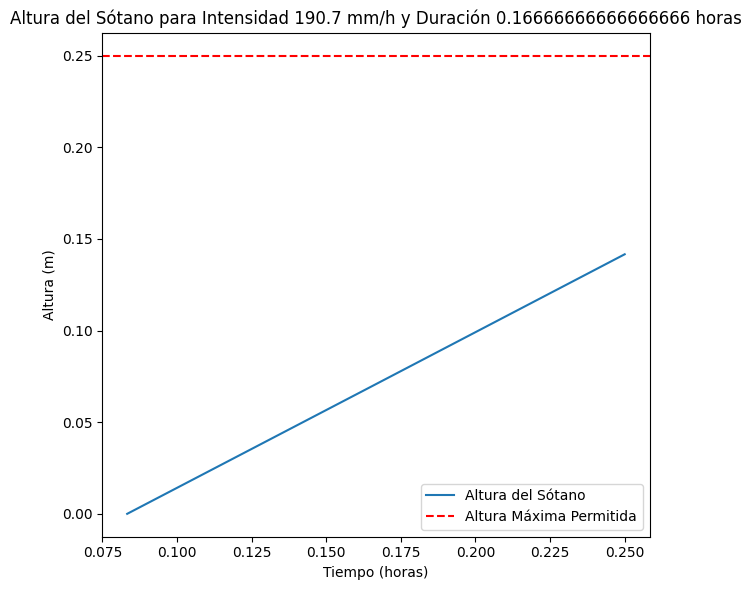

Valor adecuado de Q_max para Intensidad 190.7 mm/h y Duración 0.16666666666666666 horas: 8.007072444277659



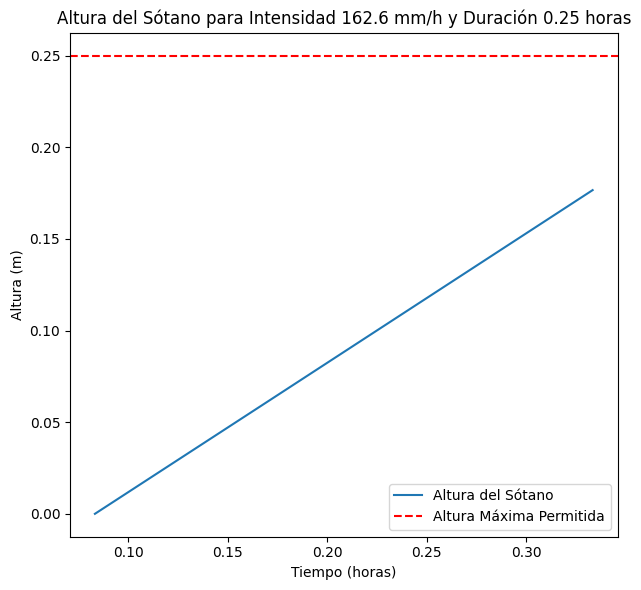

Valor adecuado de Q_max para Intensidad 162.6 mm/h y Duración 0.25 horas: 8.007072444277659



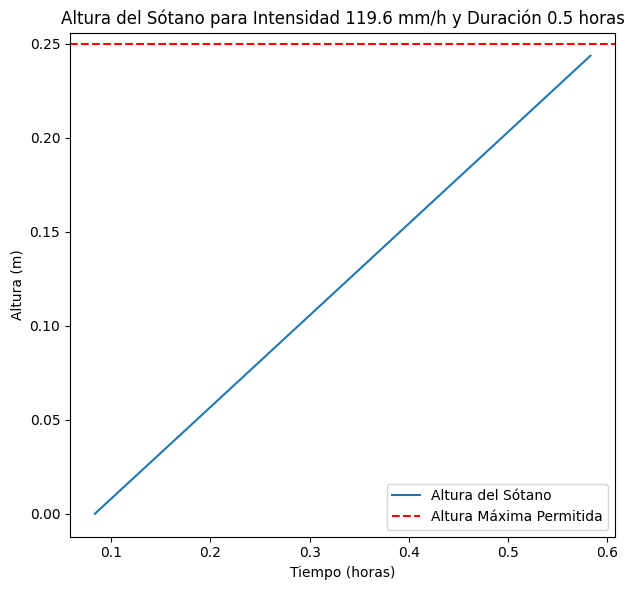

Valor adecuado de Q_max para Intensidad 119.6 mm/h y Duración 0.5 horas: 8.007072444277659



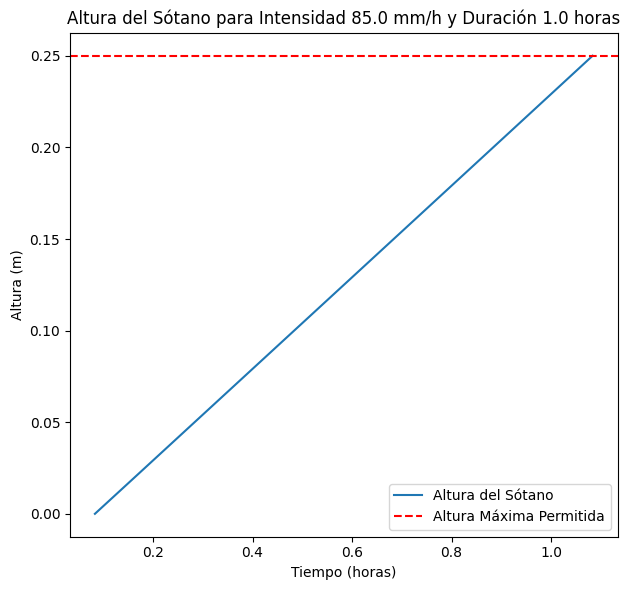

Valor adecuado de Q_max para Intensidad 85.0 mm/h y Duración 1.0 horas: 11.953496351211133



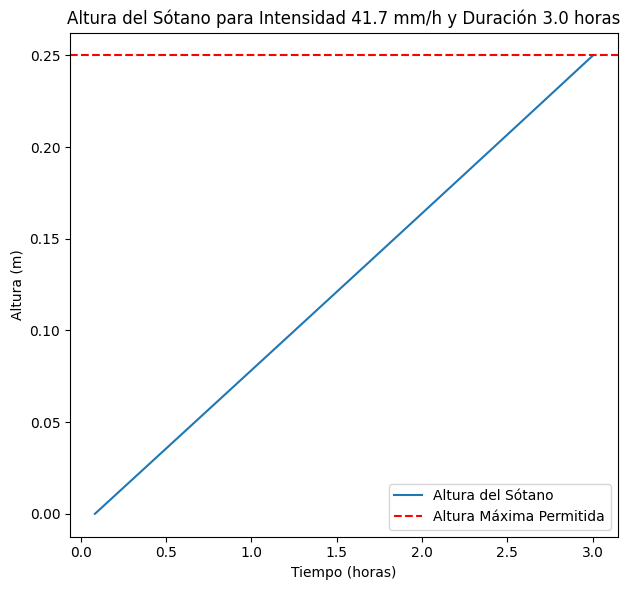

Valor adecuado de Q_max para Intensidad 41.7 mm/h y Duración 3.0 horas: 8.275825326828684



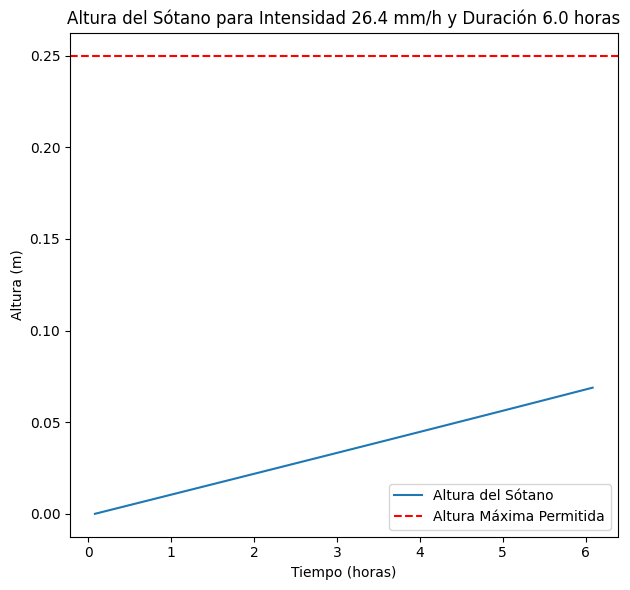

Valor adecuado de Q_max para Intensidad 26.4 mm/h y Duración 6.0 horas: 8.007072444277659



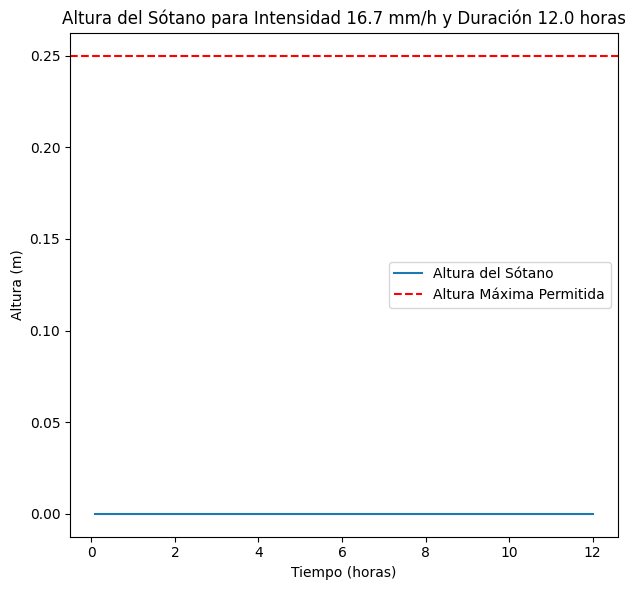

Valor adecuado de Q_max para Intensidad 16.7 mm/h y Duración 12.0 horas: 8.007072444277659



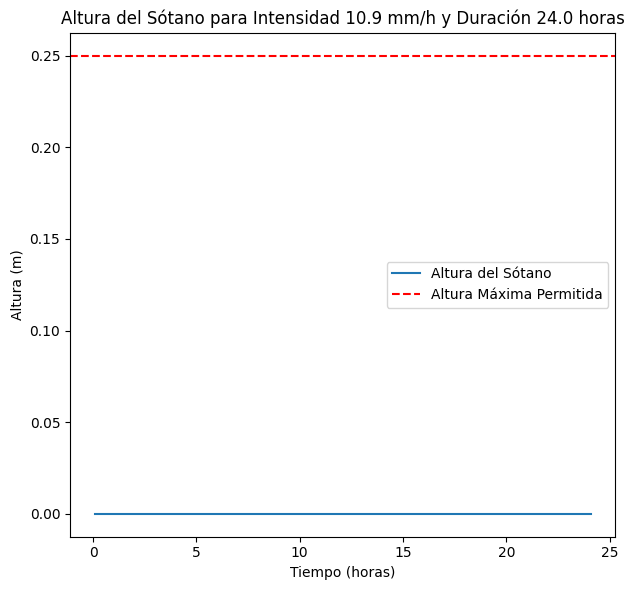

Valor adecuado de Q_max para Intensidad 10.9 mm/h y Duración 24.0 horas: 8.007072444277659



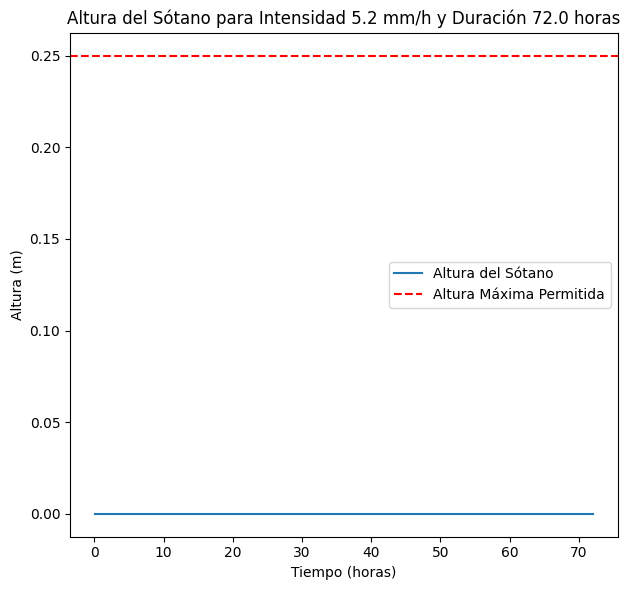

Valor adecuado de Q_max para Intensidad 5.2 mm/h y Duración 72.0 horas: 8.007072444277659

Tabla de Resultados:
   Intensidad (mm/h)  Duración (horas)  Q_max (m³/h)
0              241.4          0.083333      8.007072
1              190.7          0.166667      8.007072
2              162.6          0.250000      8.007072
3              119.6          0.500000      8.007072
4               85.0          1.000000     11.953496
5               41.7          3.000000      8.275825
6               26.4          6.000000      8.007072
7               16.7         12.000000      8.007072
8               10.9         24.000000      8.007072
9                5.2         72.000000      8.007072


In [18]:
resultados = []
import pandas as pd
import matplotlib.pyplot as plt

Q_inicial = 0

# Simular para todas las intensidades y duraciones de precipitación
for i, intensidad in enumerate(intensidades):
    duracion = duraciones[i]
    Q_deseado, tiempos, alturas = redimensionar_Q(intensidad, duracion, Q_inicial)
    max_Q_deseado = Q_deseado

    resultados.append({
        'Intensidad (mm/h)': intensidad,
        'Duración (horas)': duracion,
        'Q_max (m³/h)': max_Q_deseado
    })

    # Graficar los resultados (simulación simplificada)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(tiempos, alturas, label='Altura del Sótano')
    plt.axhline(y=0.25, color='r', linestyle='--', label='Altura Máxima Permitida')
    plt.xlabel('Tiempo (horas)')
    plt.ylabel('Altura (m)')
    plt.title(f'Altura del Sótano para Intensidad {intensidad} mm/h y Duración {duracion} horas')
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"Valor adecuado de Q_max para Intensidad {intensidad} mm/h y Duración {duracion} horas: {Q_deseado}\n")

# Crear DataFrame con los resultados
df_resultados = pd.DataFrame(resultados).drop_duplicates().reset_index(drop=True)
print("Tabla de Resultados:")
print(df_resultados)

## **C) Experimentación con distintos esquemas**


Ahora actualizando el Q_max al valor que nos dio el punto anterior y implementamos el método de Runge-Kutta de orden 2 para luego poder comparar con Euler.



In [19]:
max_Q_max = 11.953496
Q_max = max_Q_max
##nuevas ecuaciones para RK-2
#ecuacion 9
def calcular_volumen_k2_rk2(Q_in, Q_out_rk2,k1_V, delta_t):
  return ( delta_t * ((Q_in - Q_out_rk2) + k1_V / 2) )

#ecuacion 10
def calcular_c_k2_rk2(V_t, k1_V, C,k1_C,delta_t):
  return ( delta_t * ((V_t + k1_V / 2) / (V_so * t_k) * (C_sat - (C + k1_C / 2))) )


In [20]:
#delta_t es el paso
def runge_kutta_2(V_t, C, H_0, intensidad, delta_t):
    H = calcular_altura_agua(V_t, A_so)
    Delta_H = calcular_desnivel(H_0, H)
    Q_out = calcular_caudal_salida(Q_max, Delta_H, Delta_H_max, Delta_H_min)
    Q_in = calcular_caudal_entrada(C, intensidad, A_terr)

    k1_V = calcular_cambio_volumen(Q_in, Q_out, delta_t)
    k1_C = calcular_cambio_coeficiente_infiltracion(V_t, C, delta_t)

    k2_V = calcular_cambio_volumen(Q_in+ k1_V, Q_out, delta_t)
    k2_C = calcular_cambio_coeficiente_infiltracion(V_t + k1_V/2, C + k1_C/2 , delta_t)

    V_t += k2_V
    C += k2_C

    return V_t, C, H

In [21]:
# Simulación usando RK-2
def simular_runge_kutta_2(intensidad, delta_t, duracion):
  Q_max = max_Q_max
  H_0 = 0
  V_t = 0
  t = 0
  C = C_0

  tiempos = []
  alturas = []
  Q_outs = []
  Cs = []
  Q_ins = []
  Vs = []

  while t <= duracion :
    H = calcular_altura_agua(V_t, A_so)
    Delta_H = calcular_desnivel(H_0, H)
    Q_out = calcular_caudal_salida(Q_max, Delta_H, Delta_H_max, Delta_H_min)
    Q_in = calcular_caudal_entrada(C, intensidad, A_terr)

    ##nosotros no multiplicamos por h , ya que en la funcion definida ya esta implicito esto. ( se multiplica por delta_t)
    ##delta _t es igual al paso = h
    k1_V = calcular_cambio_volumen(Q_in, Q_out, delta_t)
    k1_C = calcular_cambio_coeficiente_infiltracion(V_t, C, delta_t)

    k2_V = calcular_cambio_volumen(Q_in+ k1_V, Q_out, delta_t)
    k2_C = calcular_cambio_coeficiente_infiltracion(V_t + k1_V/2, C + k1_C/2 , delta_t)

    V_t += k2_V
    C += k2_C

    if V_t < 0:
      V_t = 0

    t += delta_t
    H_0 = H

    tiempos.append(t)
    alturas.append(H_0)
    Q_outs.append(Q_out)
    Cs.append(C)
    Q_ins.append(Q_in)
    Vs.append(V_t)

  return tiempos, alturas, Q_outs, Cs, Q_ins, Vs, V_t, C

Teniendo RK-2 procedemos a simular euler con diferentes pasos (un delta_t de  0,083333 y un delta_t2 de la mitad del primero) y luego comparamos los resultados del volumen y coeficiente

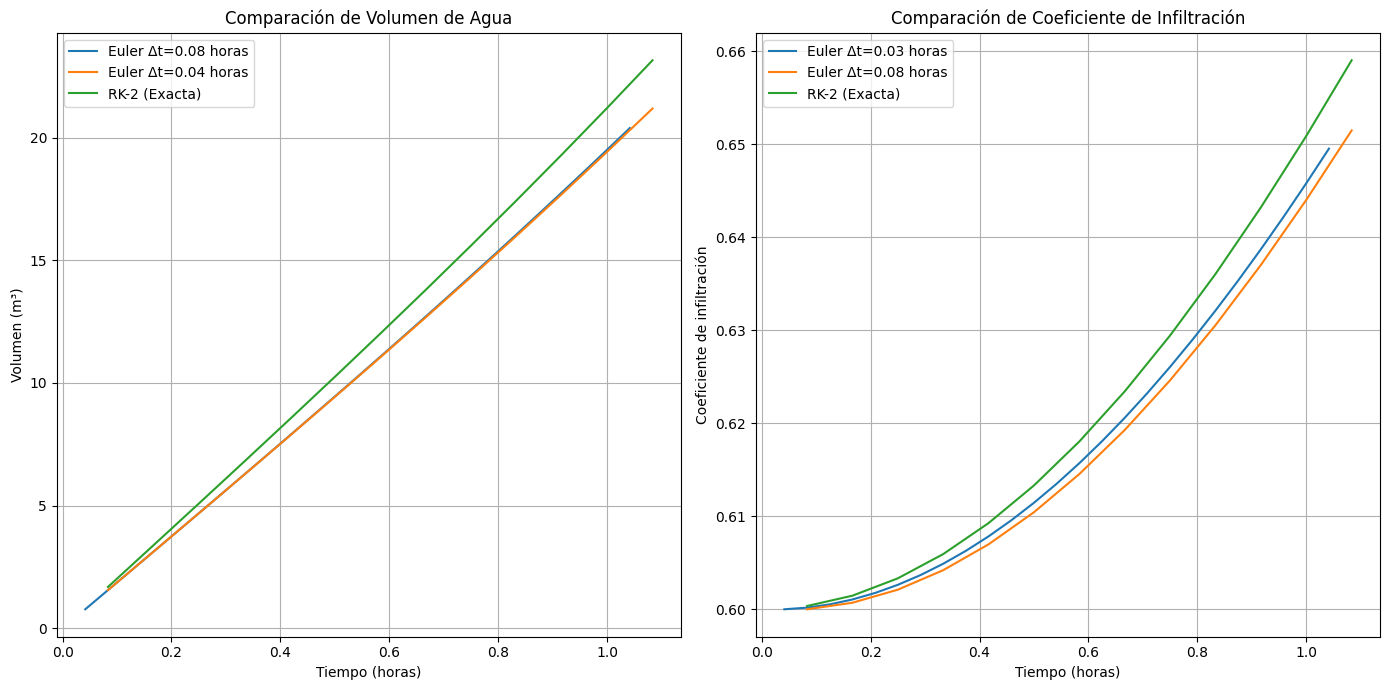

In [22]:
intensidad = 85
duracion = 1
V_t = 0
H_0 = 0
delta_t1 = 5/60
delta_t2 = delta_t1 / 2

# Simular con ambos métodos
resultados_rk2 = simular_runge_kutta_2(intensidad, delta_t1, duracion)
resultados_euler1 = simular_precipitacion_euler(intensidad, duracion,delta_t2)
resultados_euler2 = simular_precipitacion_euler(intensidad, duracion,delta_t1)


tiempos_euler1, alturas, Q_outs, Cs_euler, Q_ins, volumenes_euler1 ,V_t, C,t =  resultados_euler1

tiempos_euler2, alturas, Q_outs, Cs_euler, Q_ins, volumenes_euler2 ,V_t, C ,t= resultados_euler2

tiempos_rk2, alturas, Q_outs, coeficientes_rk2, Q_ins, volumenes_rk2 , V_t, C = resultados_rk2

# Graficar resultados
plt.figure(figsize=(14, 7))

# Volumen a través del tiempo
plt.subplot(1, 2, 1)

plt.plot(tiempos_euler1, volumenes_euler1, label=f'Euler Δt={delta_t1:.2f} horas')
plt.plot(tiempos_euler2, volumenes_euler2, label=f'Euler Δt={delta_t2:.2f} horas')
plt.plot(tiempos_rk2, volumenes_rk2, label='RK-2 (Exacta)')

plt.xlabel('Tiempo (horas)')
plt.ylabel('Volumen (m³)')
plt.title('Comparación de Volumen de Agua')
plt.legend()
plt.grid(True)

# Coeficiente de infiltración a través del tiempo
plt.subplot(1, 2, 2)
plt.plot(tiempos_euler1, resultados_euler1[3], label=f'Euler Δt={1/30:.2f} horas')
plt.plot(tiempos_euler2, resultados_euler2[3], label=f'Euler Δt={5/60:.2f} horas')
plt.plot(tiempos_rk2, coeficientes_rk2, label='RK-2 (Exacta)')

plt.xlabel('Tiempo (horas)')
plt.ylabel('Coeficiente de infiltración')
plt.title('Comparación de Coeficiente de Infiltración')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Como no se ve un cambio notable en el grafico, para ver mejor la diferencia decidimos graficarla

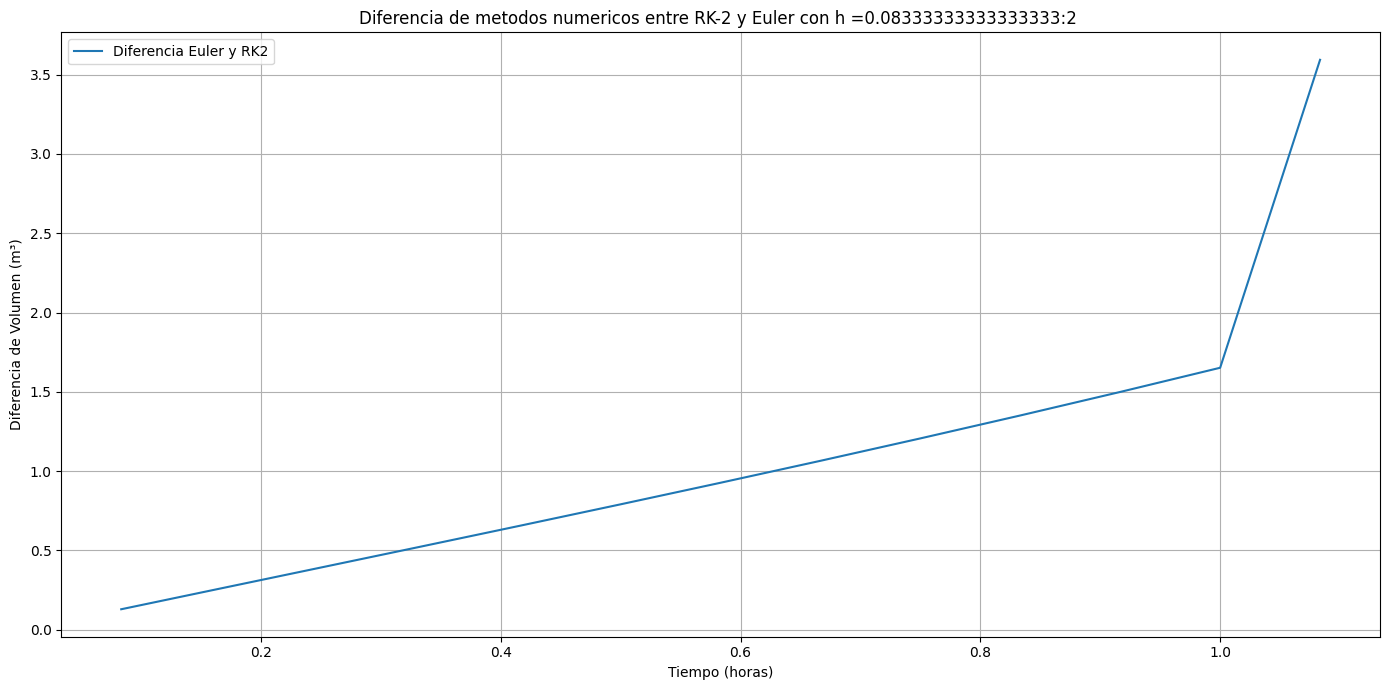

In [23]:
# Simular con ambos métodos
intensidad = 85
duracion = 1
V_t = 0
H_0 = 0
delta_t1 = 1/60
resultados_rk21 = simular_runge_kutta_2(intensidad, delta_t1, duracion)
resultados_euler = simular_precipitacion_euler(intensidad, duracion,delta_t1)

tiempos_rk2, alturas, Q_outs, coeficientes_rk2, Q_ins, volumenes_rk2 , V_t, C = resultados_rk2
tiempos_euler, alturas, Q_outs, Cs_euler, Q_ins, volumenes_euler ,V_t, C,t =  resultados_euler

volumenes_euler_interp1 = np.interp(tiempos_rk2, tiempos_euler, volumenes_euler)


diferencias_volumen = np.abs(np.array(volumenes_rk2) - np.array(volumenes_euler_interp1))

plt.figure(figsize=(14, 7))

plt.plot(tiempos_rk2, diferencias_volumen, label=f'Diferencia Euler y RK2')

plt.xlabel('Tiempo (horas)')
plt.ylabel('Diferencia de Volumen (m³)')
plt.title(f'Diferencia de metodos numericos entre RK-2 y Euler con h ={5/60}:2 ')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Grafico con ahora con la mitad del delta_t

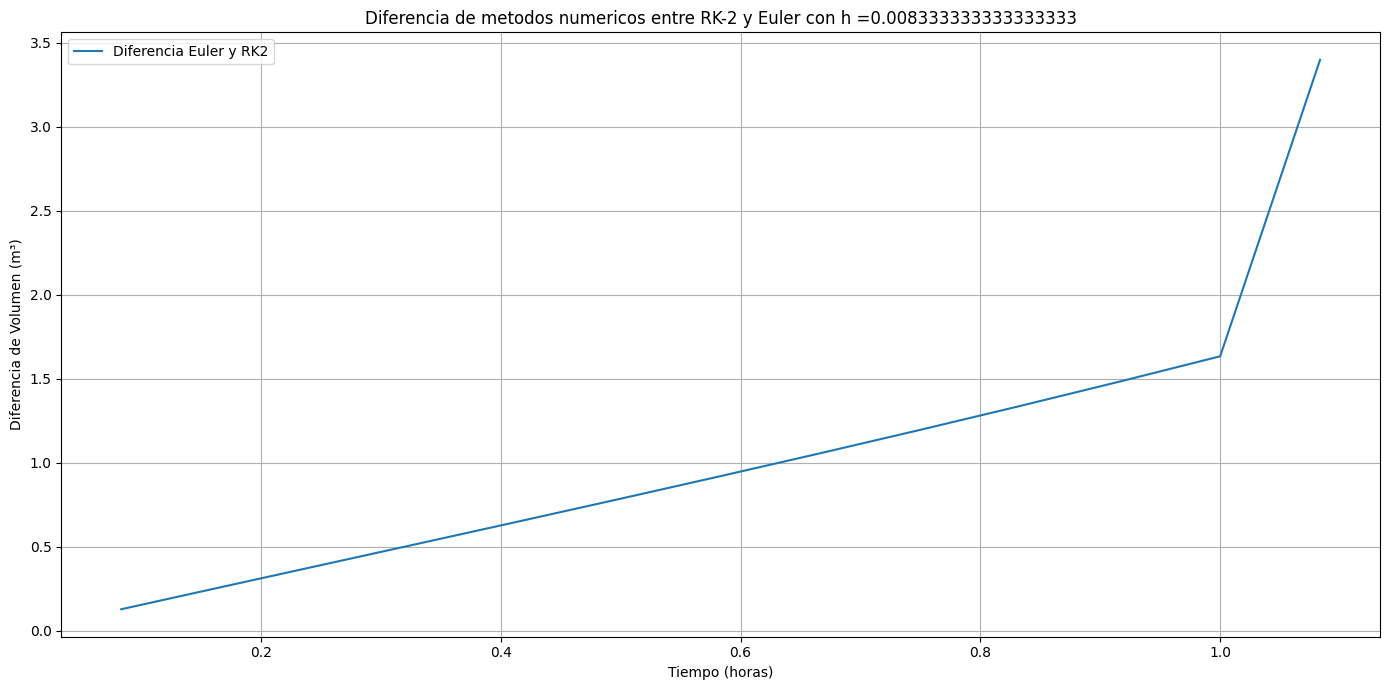

In [24]:
# Simular con ambos métodos
intensidad = 85
duracion = 1
V_t = 0
H_0 = 0
delta_t2 = delta_t1 / 2
resultados_rk21 = simular_runge_kutta_2(intensidad, delta_t2, duracion)
resultados_euler = simular_precipitacion_euler(intensidad, duracion,delta_t2)

# Extraer volúmenes y tiempos
tiempos_rk2, alturas, Q_outs, coeficientes_rk2, Q_ins, volumenes_rk2 , V_t, C = resultados_rk2
tiempos_euler, alturas, Q_outs, Cs_euler, Q_ins, volumenes_euler ,V_t, C,t =  resultados_euler

# Interpolate volúmenes de Euler para que coincidan con los tiempos de RK-2
volumenes_euler_interp2 = np.interp(tiempos_rk2, tiempos_euler, volumenes_euler)

# Calcular diferencias
diferencias_volumen = np.abs(np.array(volumenes_rk2) - np.array(volumenes_euler_interp2))

# Graficar diferencias
plt.figure(figsize=(14, 7))

plt.plot(tiempos_rk2, diferencias_volumen, label=f'Diferencia Euler y RK2')

plt.xlabel('Tiempo (horas)')
plt.ylabel('Diferencia de Volumen (m³)')
plt.title(f'Diferencia de metodos numericos entre RK-2 y Euler con h ={delta_t2}')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Todo junto seria:

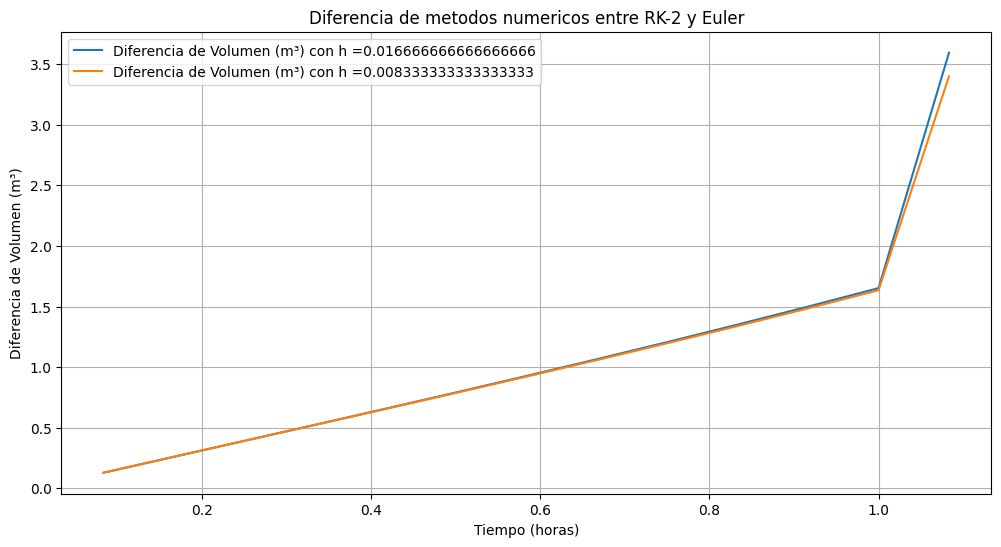

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(tiempos_rk2, np.abs(volumenes_rk2 - volumenes_euler_interp1), label= f'Diferencia de Volumen (m³) con h ={delta_t1}')
plt.plot(tiempos_rk2, np.abs(volumenes_rk2 - volumenes_euler_interp2), label= f'Diferencia de Volumen (m³) con h ={delta_t2}')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Diferencia de Volumen (m³)')
plt.title('Diferencia de metodos numericos entre RK-2 y Euler')
plt.legend()
plt.grid(True)
plt.show()

### Orden de Euler

Para analizar que es de orden 1 Euler usamos la definicion de estabilidad.
\begin{equation}
|\frac{\epsilon_{n+1}}{\epsilon_{n}}| < 1\
\end{equation}

Para verificar que el método de Euler es de orden 1, debemos analizar cómo el error global se comporta en relación con h, el paso de tiempo. Si duplicamos h, el error global también debería duplicarse aproximadamente. Esto se puede verificar empíricamente al comparar la solución obtenida por Euler con una solución "exacta" o más precisa, como la solución obtenida por RK-2 en este caso.


In [26]:
def calcular_error_global(volumenes_exactos, volumenes_aproximados):
    volumenes_exactos = np.array(volumenes_exactos)
    volumenes_aproximados = np.array(volumenes_aproximados)
    error = np.linalg.norm(volumenes_exactos - volumenes_aproximados) / np.linalg.norm(volumenes_exactos)
    return error

In [27]:
ratio_dt = delta_t1 / delta_t2

error_euler1 = calcular_error_global([volumenes_rk2[-1]], [volumenes_euler_interp1[-1]])
error_euler2 = calcular_error_global([volumenes_rk2[-1]], [volumenes_euler_interp2[-1]])

print(f"Error global con paso de tiempo {delta_t1}: {error_euler1}")
print(f"Error global con paso de tiempo {delta_t2}: {error_euler2}")

orden_convergencia_estimado = np.log(error_euler1 / error_euler2) / np.log(ratio_dt)
orden_convergencia_estimado_absoluto = np.abs(orden_convergencia_estimado)
print(f"Orden de convergencia estimado: {orden_convergencia_estimado_absoluto}")

Error global con paso de tiempo 0.016666666666666666: 0.1552466254502379
Error global con paso de tiempo 0.008333333333333333: 0.14684359522891025
Orden de convergencia estimado: 0.08028156730635104


#  D) Conclusiones

Presente sus conclusiones del trabajo práctico. En particular, comente sobre la relación problema físico-problema numérico, los tipos de errores involucrados en la resolución del problema numérico, la importancia/efecto de cada uno, estabilidad y consistencia.

**El método de Runge-Kutta de orden 4 (RK4)**



In [28]:
def derivadas(V, C, H_0, intensidad):
    H = calcular_altura_agua(V, A_so)
    Delta_H = calcular_desnivel(H_0, H)
    Q_out = calcular_caudal_salida(Q_max, Delta_H, Delta_H_max, Delta_H_min)
    Q_in = calcular_caudal_entrada(C, intensidad, A_terr)
    dV = calcular_tasa_cambio_volumen(Q_in,Q_out)
    dC = calcular_cambio_coeficiente_infiltracion(V, C, 1)
    return dV, dC


In [29]:
def runge_kutta_4(V, C, H_0, intensidad, delta_t):
    dV1, dC1 = derivadas(V, C, H_0, intensidad)
    dV2, dC2 = derivadas(V + 0.5 * delta_t * dV1, C + 0.5 * delta_t * dC1, H_0, intensidad)
    dV3, dC3 = derivadas(V + 0.5 * delta_t * dV2, C + 0.5 * delta_t * dC2, H_0, intensidad)
    dV4, dC4 = derivadas(V + delta_t * dV3, C + delta_t * dC3, H_0, intensidad)

    V_t = V + (delta_t / 6.0) * (dV1 + 2 * dV2 + 2 * dV3 + dV4)
    C_resultante = C + (delta_t / 6.0) * (dC1 + 2 * dC2 + 2 * dC3 + dC4)

    return V_t, C_resultante


In [30]:
def simular_precipitacion_rk(intensidad, duracion, delta_t):
    V_t = 0         # Volumen total
    t = 0           # Iterador
    H_0 = 0         # Altura inicial del sótano
    C = C_0         # Coeficiente de infiltración inicial

    tiempos = []
    alturas = []
    Q_outs = []
    Cs = []
    Q_ins = []
    Vs = []

    # Simulación durante la precipitación
    while t <= duracion:
        V = V_t
        dV1, dC1 = derivadas(V, C, H_0, intensidad)
        dV2, dC2 = derivadas(V + 0.5 * delta_t * dV1, C + 0.5 * delta_t * dC1, H_0, intensidad)
        dV3, dC3 = derivadas(V + 0.5 * delta_t * dV2, C + 0.5 * delta_t * dC2, H_0, intensidad)
        dV4, dC4 = derivadas(V + delta_t * dV3, C + delta_t * dC3, H_0, intensidad)

        V_t = V + (delta_t / 6.0) * (dV1 + 2 * dV2 + 2 * dV3 + dV4)
        C_f = C + (delta_t / 6.0) * (dC1 + 2 * dC2 + 2 * dC3 + dC4)
        if V_t < 0:
          V_t = 0
        H = calcular_altura_agua(V_t, A_so)
        Delta_H = calcular_desnivel(H_0, H)
        Q_out = calcular_caudal_salida(Q_max, Delta_H, Delta_H_max, Delta_H_min)
        Q_in = calcular_caudal_entrada(C, intensidad, A_terr)

        t += delta_t
        H_0 = H
        C= C_f

        tiempos.append(t)
        alturas.append(H)
        Q_outs.append(Q_out)
        Cs.append(C)
        Q_ins.append(Q_in)
        Vs.append(V_t)

    return tiempos, alturas, Q_outs, Cs, Q_ins, Vs, V_t, C

Ahora presentamos el metodo RK-4 con todas las intensidades con su duracion respectiva

A continuacion para la conclusion vamos a agregar un grafico con todos los metodos juntos en un solo grafico asi podemos comparar.

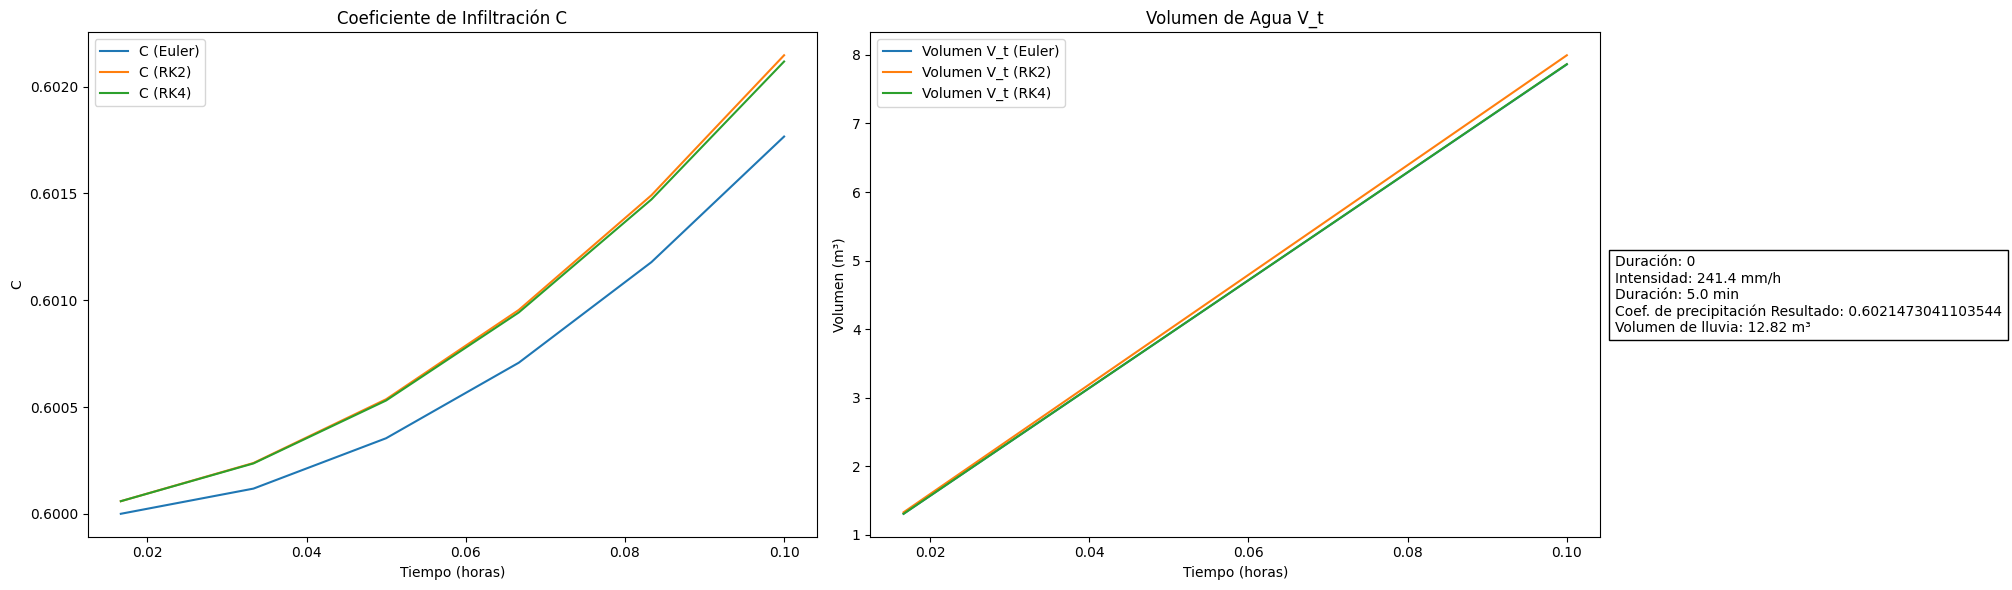

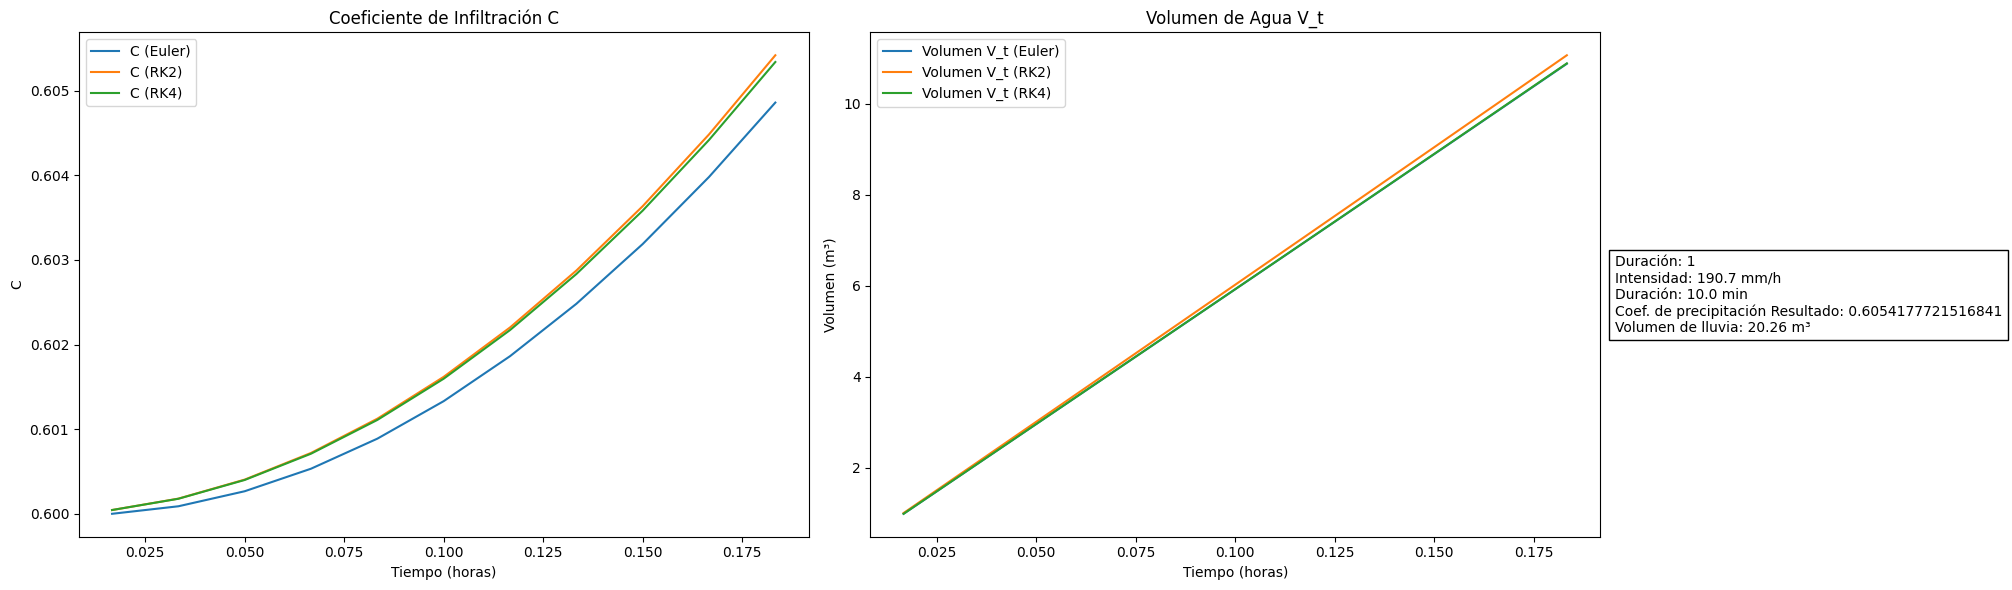

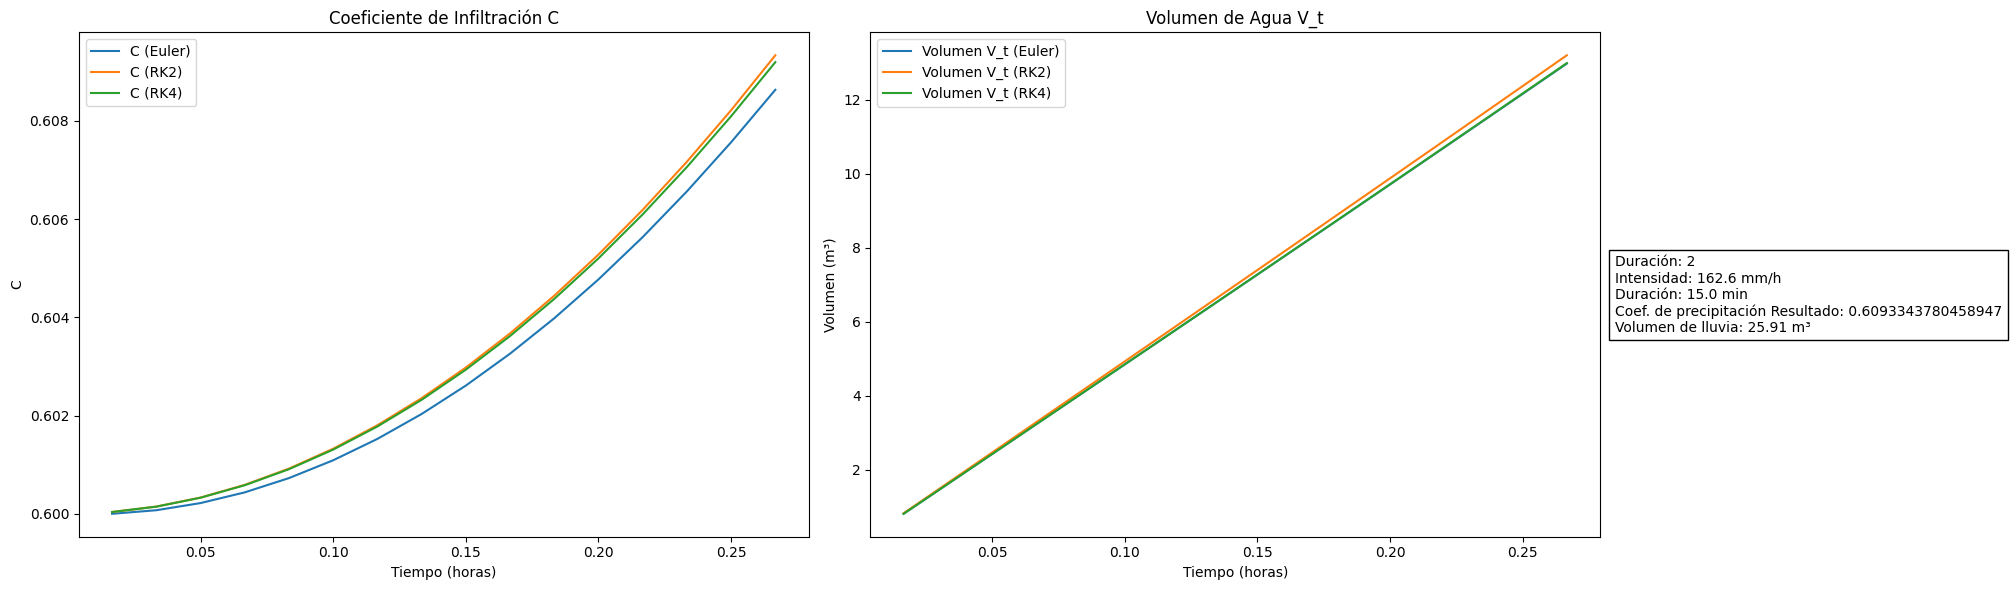

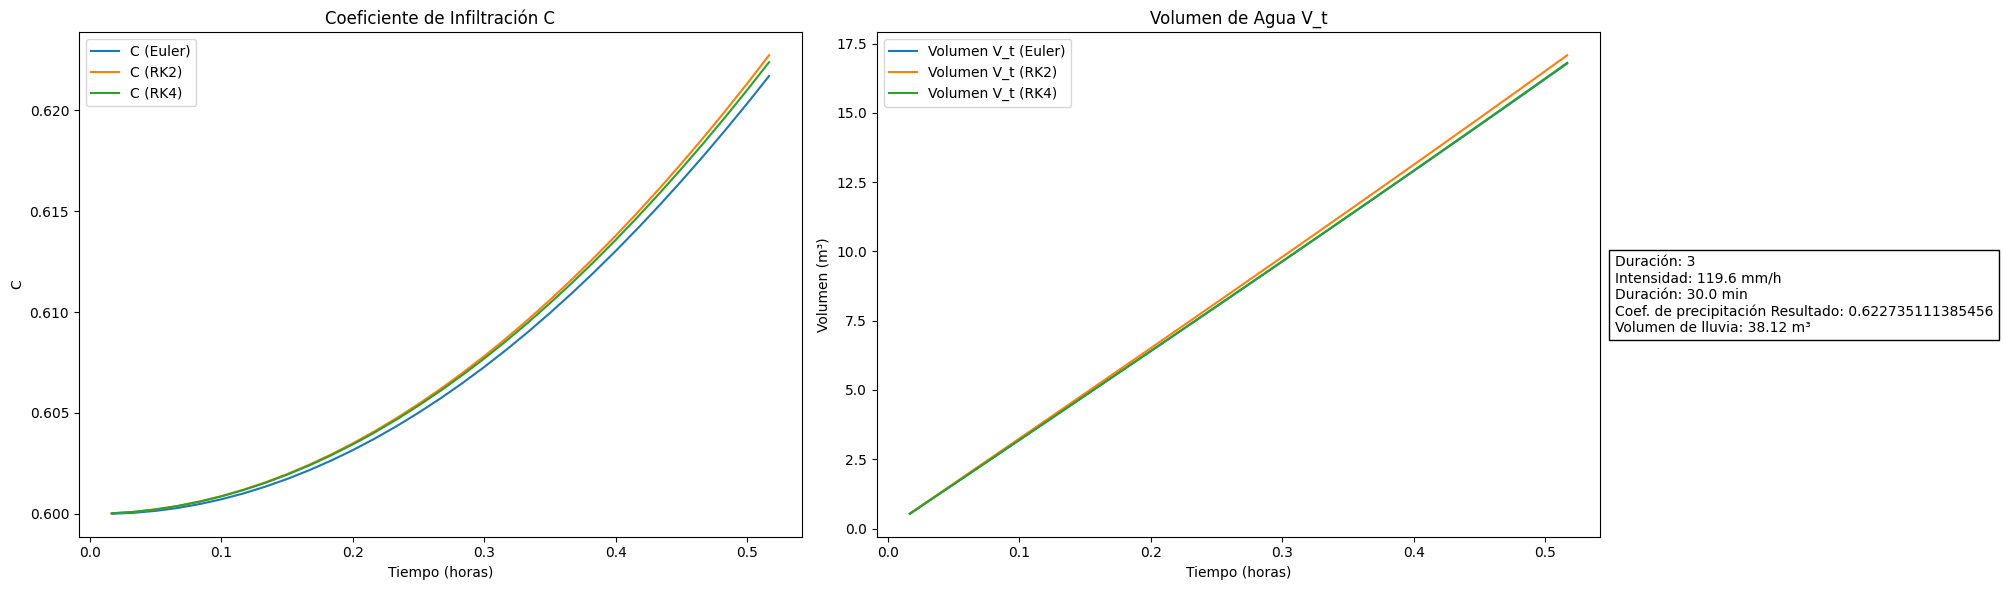

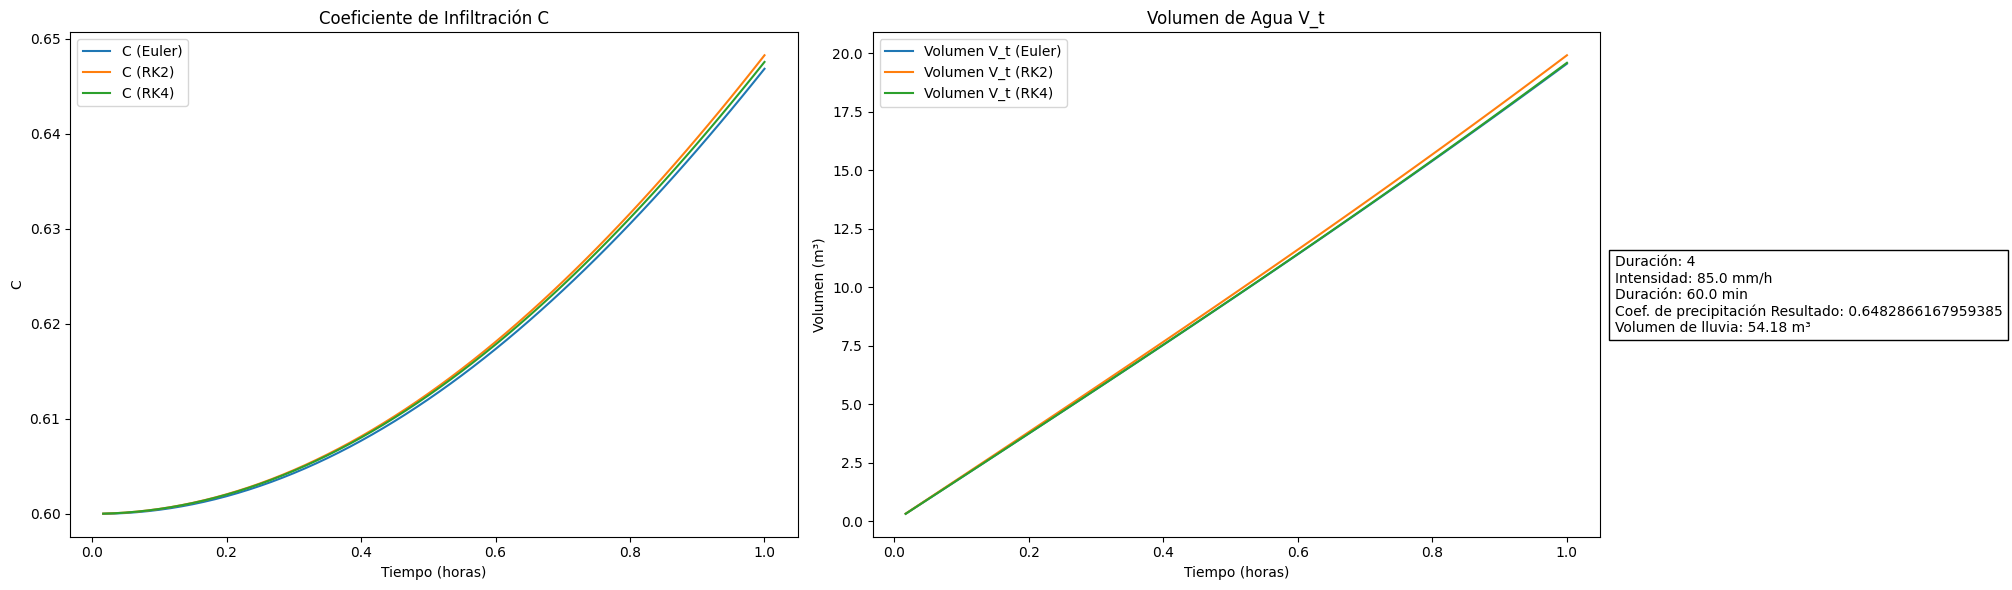

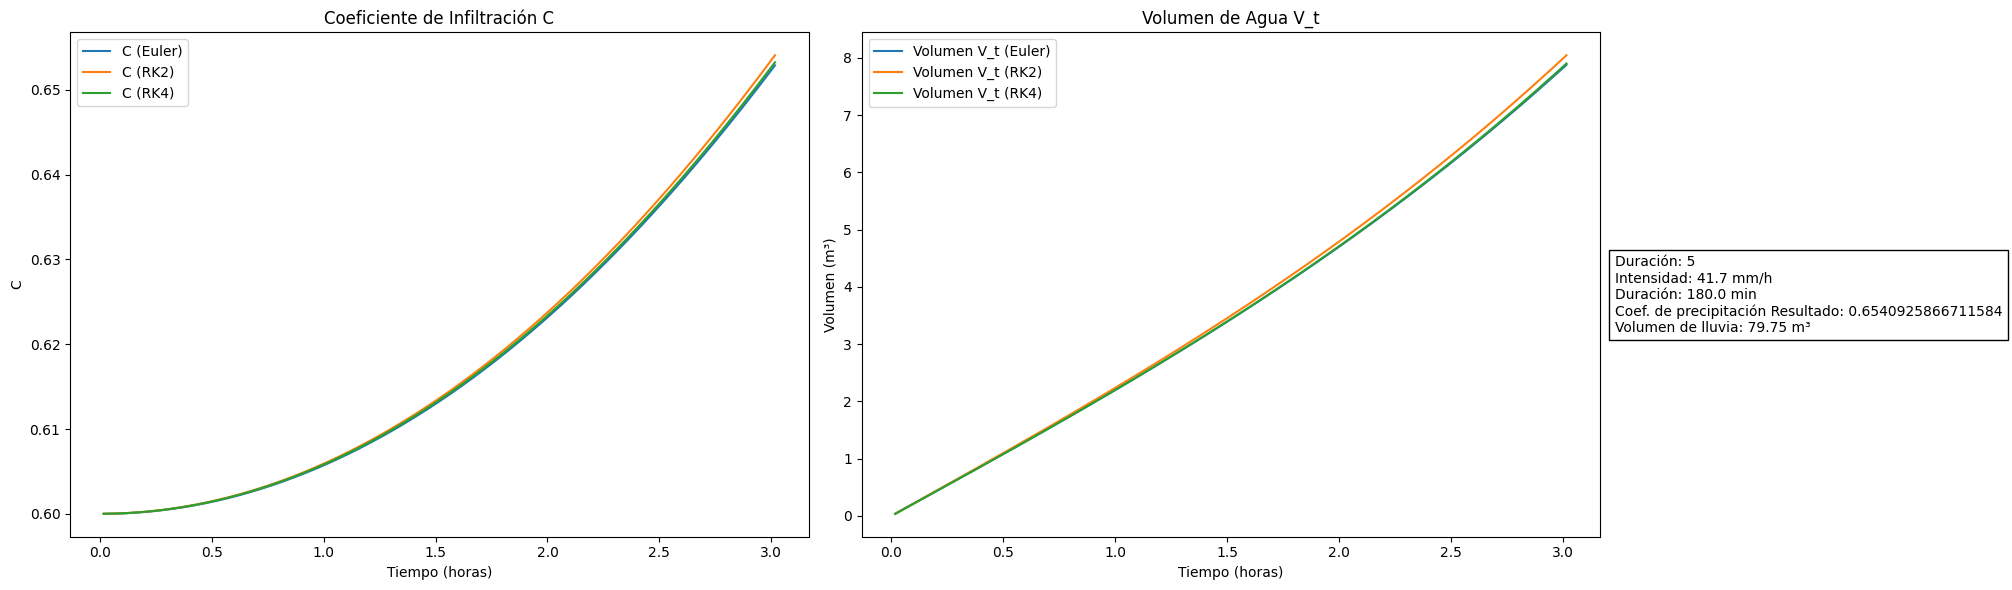

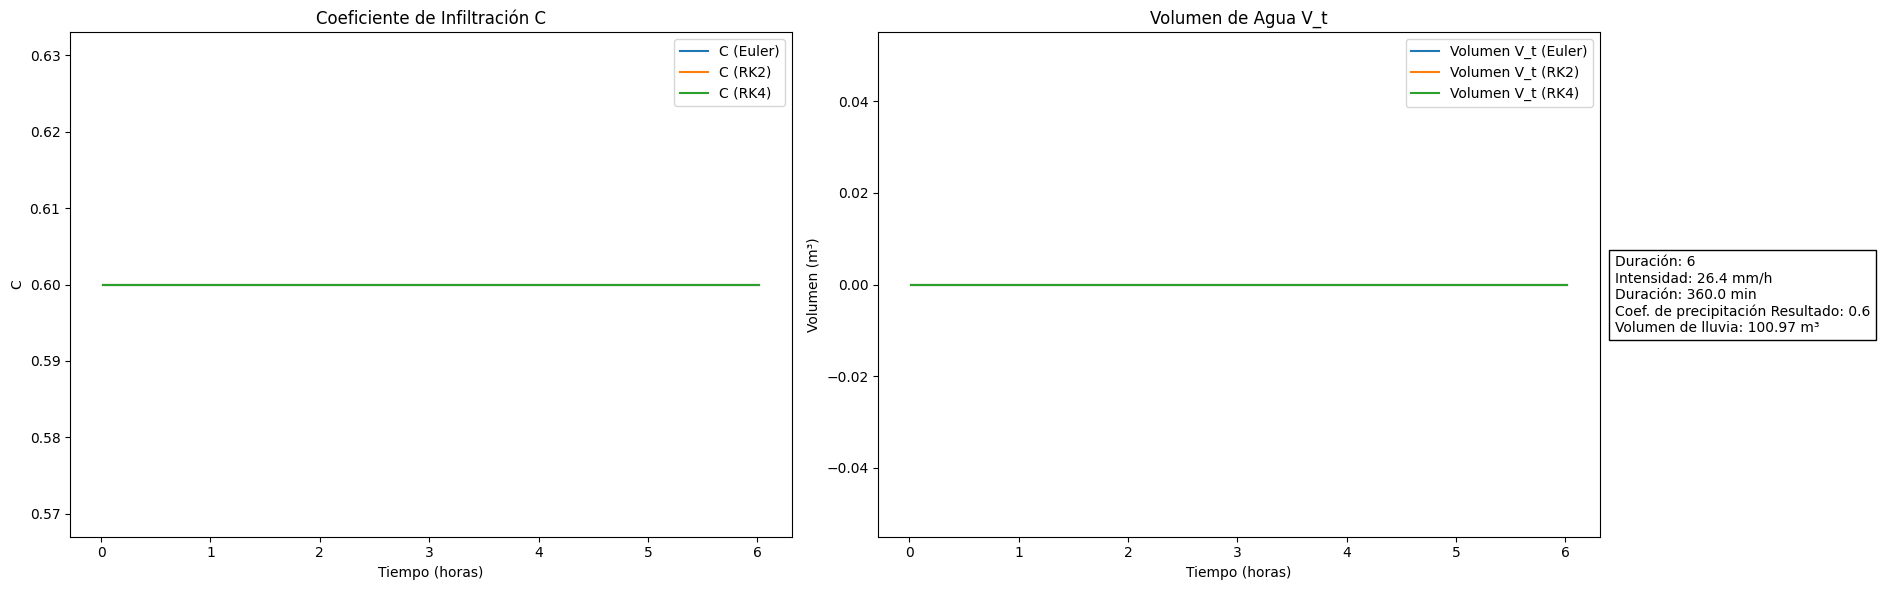

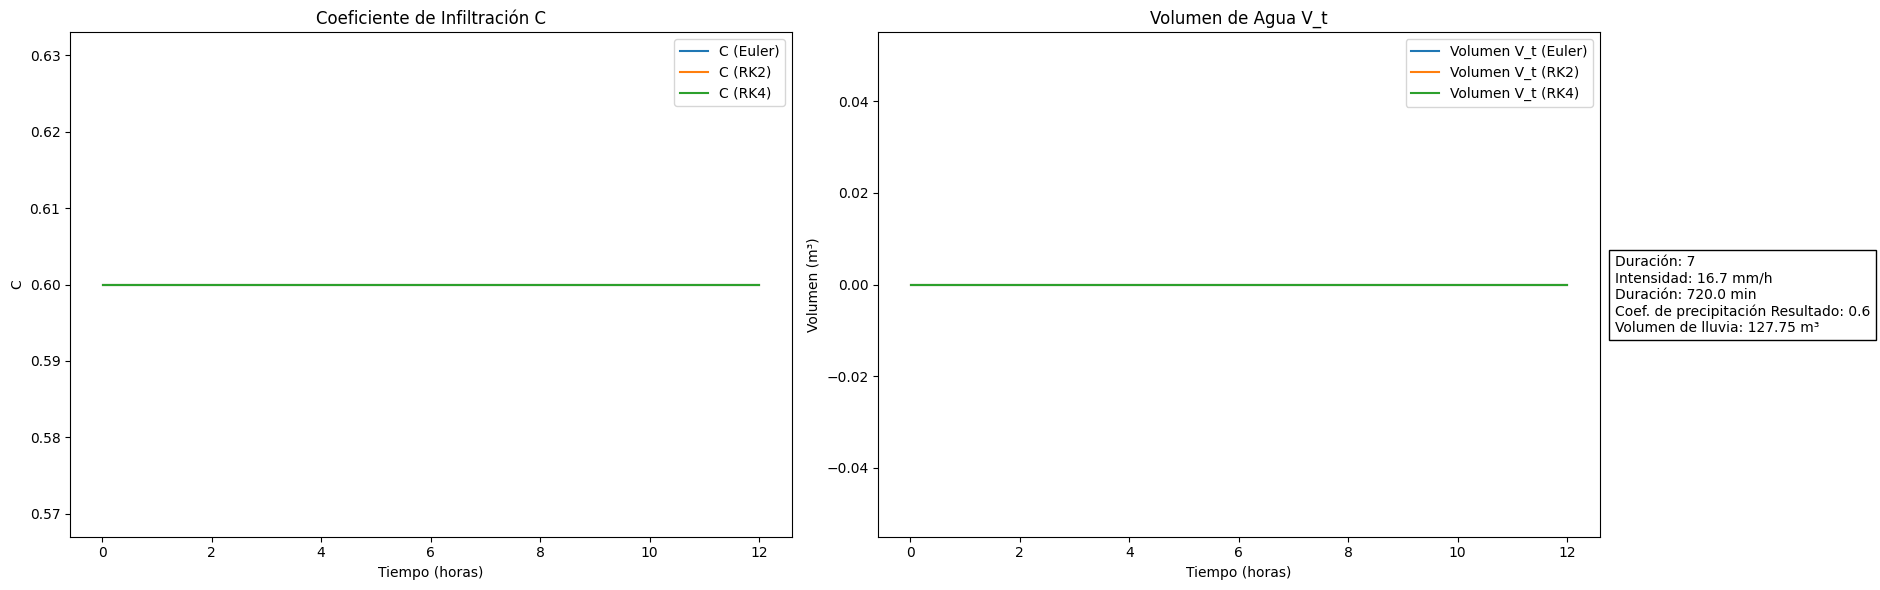

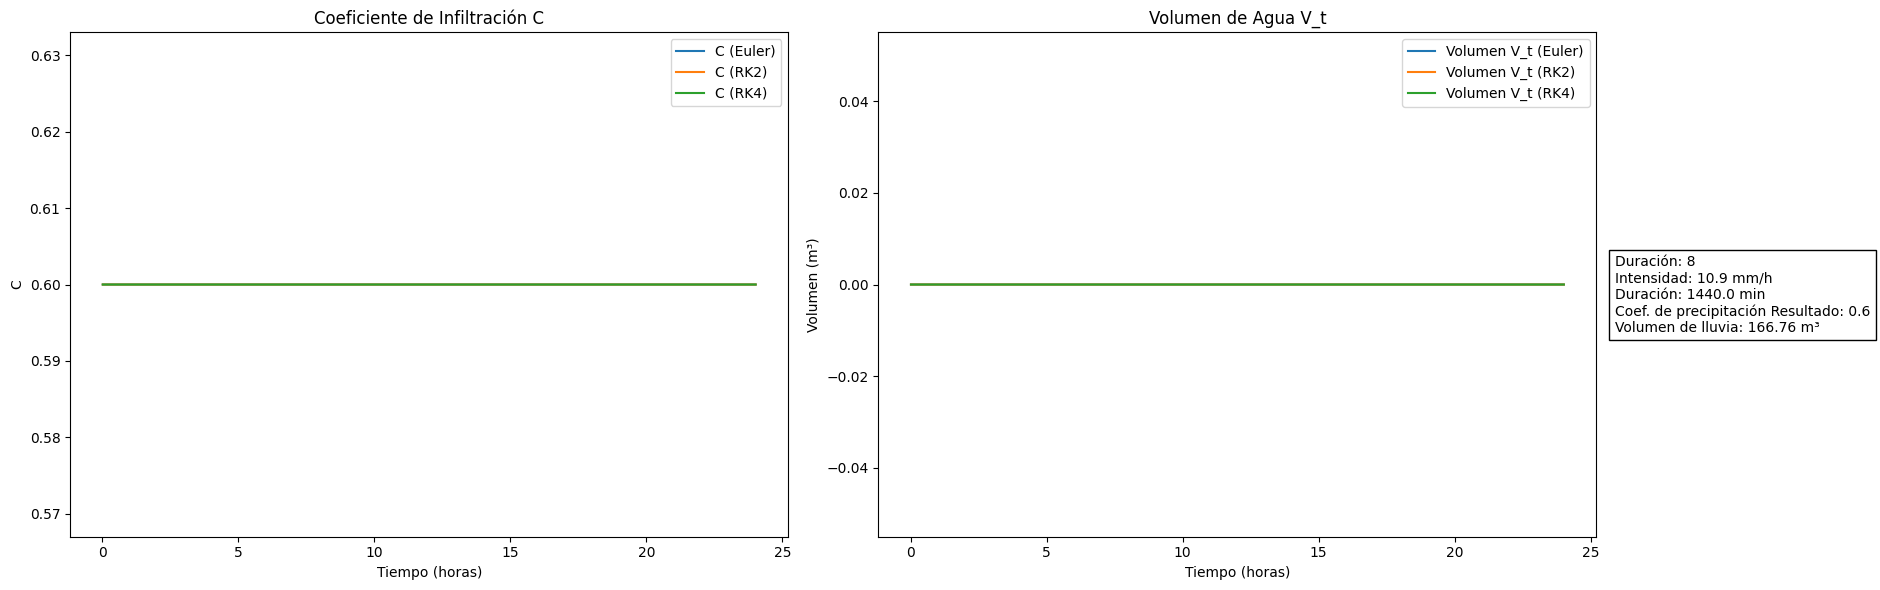

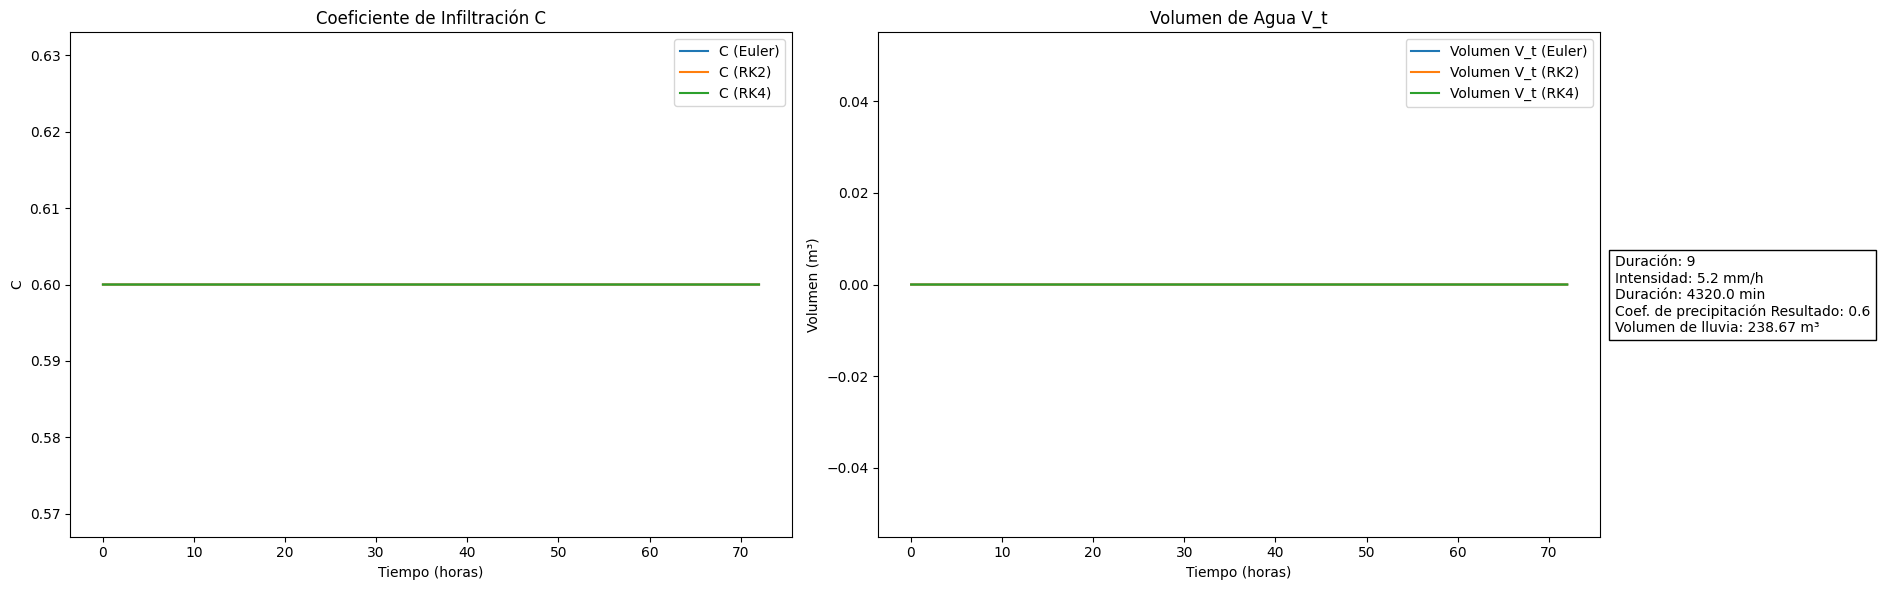

In [31]:
# Simular para todas las intensidades y duraciones de precipitación
delta_t = 1/60

for i, intensidad in enumerate(intensidades):
    duracion = duraciones[i]
    resultados_rk2 = simular_runge_kutta_2(intensidad, delta_t, duracion)
    tiempos_rk2, alturas_rk2, Q_outs_rk2, coeficientes_rk2, Q_ins_rk2, volumenes_rk2 , V_t_rk2, C_rk2 = resultados_rk2

    resultados_rk4 = simular_precipitacion_rk(intensidad, duracion, delta_t)
    tiempos_rk4, alturas_rk4, Q_outs_rk4, Cs_rk4, Q_ins_rk4, Vs_rk4 , Vs_final_rk4, C_final_rk4 = resultados_rk4

    resultados_euler = simular_precipitacion_euler(intensidad, duracion, delta_t)
    tiempos_euler, alturas_euler, Q_outs_euler, Cs_euler, Q_ins_euler, Vs_euler, V_t_euler, C_euler, t_euler = resultados_euler

    # Find the shortest time array to ensure compatibility
    min_length = min(len(tiempos_rk2), len(tiempos_rk4), len(tiempos_euler))

    # Interpolar datos a un tiempo común
    tiempo_comun = np.linspace(0, max(tiempos_rk2), num=min_length) # Use min_length here

    info_text = (
        f"Duración: {i}\n"
        f"Intensidad: {intensidad} mm/h\n"
        f"Duración: {duracion * 60} min\n"
        f"Coef. de precipitación Resultado: {C_rk2}\n"
        f"Volumen de lluvia: {intensidad * A_terr * duracion / 1000:.2f} m³"
    )

    plt.figure(figsize=(18, 6))  # Más ancho que alto

    plt.subplot(1, 2, 1)
    plt.plot(tiempos_euler, Cs_euler, label='C (Euler)')
    plt.plot(tiempos_rk2, coeficientes_rk2, label='C (RK2)')
    plt.plot(tiempos_rk4, Cs_rk4, label='C (RK4)')
    plt.xlabel('Tiempo (horas)')
    plt.ylabel('C')
    plt.title('Coeficiente de Infiltración C')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(tiempos_euler, Vs_euler, label='Volumen V_t (Euler)')
    plt.plot(tiempos_rk2, volumenes_rk2, label='Volumen V_t (RK2)')
    plt.plot(tiempos_rk4, Vs_rk4, label='Volumen V_t (RK4)')
    plt.xlabel('Tiempo (horas)')
    plt.ylabel('Volumen (m³)')
    plt.title('Volumen de Agua V_t')
    plt.legend()

    # Ajustar el layout antes de añadir el texto
    plt.tight_layout(rect=[0, 0, 0.90, 1])  # Ajustar el espacio para añadir el texto en el lado derecho

    # Añadir información al lado del gráfico
    plt.gcf().text(0.9, 0.5,info_text ,fontsize=10, bbox=dict(boxstyle="square,pad=0.4", edgecolor="black", facecolor="white"),
                   transform=plt.gcf().transFigure, ha='left', va='center')

    plt.show()
